In [0]:
%sql

-- Temporary view to test SQL code to include in Python.

CREATE DATABASE IF NOT EXISTS Project_DB;
USE Project_DB;

CREATE OR REPLACE TEMPORARY VIEW df AS
SELECT * FROM delta.`/user/hive/warehouse/project_db.db/eventsgold`
WHERE
    Sport IN ('Athletics', 'Swimming', 'Cycling') AND
    Country IN ('USA', 'Germany', 'Russia', 'UK', 'France', 'Australia', 'Italy', 'Canada', 'Japan', 'China');

SELECT * FROM df LIMIT 10;

ID,Sex,Age,Height,Weight,Country,Year,Sport,Medal
259,F,21,173,59,Canada,1984,Swimming,NA
449,F,26,164,58,Russia,2008,Athletics,NA
460,M,22,190,78,Russia,1972,Swimming,NA
587,F,26,178,61,Germany,1988,Athletics,NA
650,M,18,182,68,Canada,2016,Swimming,NA
737,F,33,188,66,USA,2008,Athletics,NA
747,M,22,179,60,Japan,1936,Athletics,NA
803,F,16,165,54,UK,1976,Swimming,NA
824,M,31,189,70,Australia,2008,Athletics,NA
836,M,23,188,78,USA,1908,Athletics,NA


In [0]:
%sql

SELECT
  COUNT(DISTINCT Sport) AS Sports,
  COUNT(DISTINCT Country) AS Countries
FROM df

Sports,Countries
3,10


In [0]:
pip install pandasql

Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
  Using cached pandasql-0.7.3-py3-none-any.whl
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.


In [0]:
# dbutils.library.restartPython() # To restart kernel in case packages are not updated.

import pandas as pd
import numpy as np

import seaborn as sns
colors = sns.color_palette('pastel')
sns.set_palette(palette = colors)
sns.set()

from matplotlib import pyplot as plt
plt.rcParams['figure.dpi'] = 300

from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("DeltaToPandas").getOrCreate()

In [0]:
%fs ls dbfs:/user/hive/warehouse/project_db.db/eventsgold

path,name,size,modificationTime
dbfs:/user/hive/warehouse/project_db.db/eventsgold/_delta_log/,_delta_log/,0,0
dbfs:/user/hive/warehouse/project_db.db/eventsgold/part-00000-d9301de5-d271-41db-8ec4-570fa5f6270a-c000.snappy.parquet,part-00000-d9301de5-d271-41db-8ec4-570fa5f6270a-c000.snappy.parquet,28086,1697338555000
dbfs:/user/hive/warehouse/project_db.db/eventsgold/part-00001-29232efb-35c6-419f-9a23-3e838c11e03d-c000.snappy.parquet,part-00001-29232efb-35c6-419f-9a23-3e838c11e03d-c000.snappy.parquet,28474,1697338555000
dbfs:/user/hive/warehouse/project_db.db/eventsgold/part-00002-31238b77-9268-4151-aa77-a7b73d47bcc2-c000.snappy.parquet,part-00002-31238b77-9268-4151-aa77-a7b73d47bcc2-c000.snappy.parquet,27159,1697338555000
dbfs:/user/hive/warehouse/project_db.db/eventsgold/part-00003-b4588ce4-f198-4dda-ac2b-55a619121c9a-c000.snappy.parquet,part-00003-b4588ce4-f198-4dda-ac2b-55a619121c9a-c000.snappy.parquet,27582,1697338555000
dbfs:/user/hive/warehouse/project_db.db/eventsgold/part-00004-1e33ef28-84c2-457b-9c41-4f6c8d5b07bf-c000.snappy.parquet,part-00004-1e33ef28-84c2-457b-9c41-4f6c8d5b07bf-c000.snappy.parquet,28044,1697338555000
dbfs:/user/hive/warehouse/project_db.db/eventsgold/part-00005-109a8339-8c2e-4a12-adb7-90d8d163ad9c-c000.snappy.parquet,part-00005-109a8339-8c2e-4a12-adb7-90d8d163ad9c-c000.snappy.parquet,26805,1697338555000
dbfs:/user/hive/warehouse/project_db.db/eventsgold/part-00006-59a82534-6c75-4f4b-8672-d8ca218cf1dd-c000.snappy.parquet,part-00006-59a82534-6c75-4f4b-8672-d8ca218cf1dd-c000.snappy.parquet,28485,1697338555000
dbfs:/user/hive/warehouse/project_db.db/eventsgold/part-00007-2deebfbd-1c72-461a-b143-a376fd6c6812-c000.snappy.parquet,part-00007-2deebfbd-1c72-461a-b143-a376fd6c6812-c000.snappy.parquet,31639,1697338555000


In [0]:
delta_table_path = '/user/hive/warehouse/project_db.db/eventsgold'

# Read the Delta table into a Spark DF.
delta_df = spark.read.format('delta').load(delta_table_path)

# Convert the Spark DF to a Pandas DF.
df = delta_df.toPandas()

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24407 entries, 0 to 24406
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       24407 non-null  int32 
 1   Sex      24407 non-null  object
 2   Age      24407 non-null  int32 
 3   Height   24407 non-null  int32 
 4   Weight   24407 non-null  int32 
 5   Country  24407 non-null  object
 6   Year     24407 non-null  int32 
 7   Sport    24407 non-null  object
 8   Medal    24407 non-null  object
dtypes: int32(5), object(4)
memory usage: 1.2+ MB



## Descriptive statistics


These are the attributes of interest. We are going to make our analysis based on these.

In [0]:
df.describe().iloc[:, 1:-1].round(2)

,Age,Height,Weight
count,24407.00,24407.00,24407.00
mean,23.58,177.73,70.54
std,4.67,9.31,13.69
min,12.00,146.00,35.00
25%,20.00,171.00,61.00
50%,23.00,178.00,69.00
75%,26.00,184.00,78.00
max,52.00,208.00,160.00



### Age

From the graph, we can see that the distribution is right-skewed and is unimodal.

<AxesSubplot:xlabel='Age', ylabel='Count'>

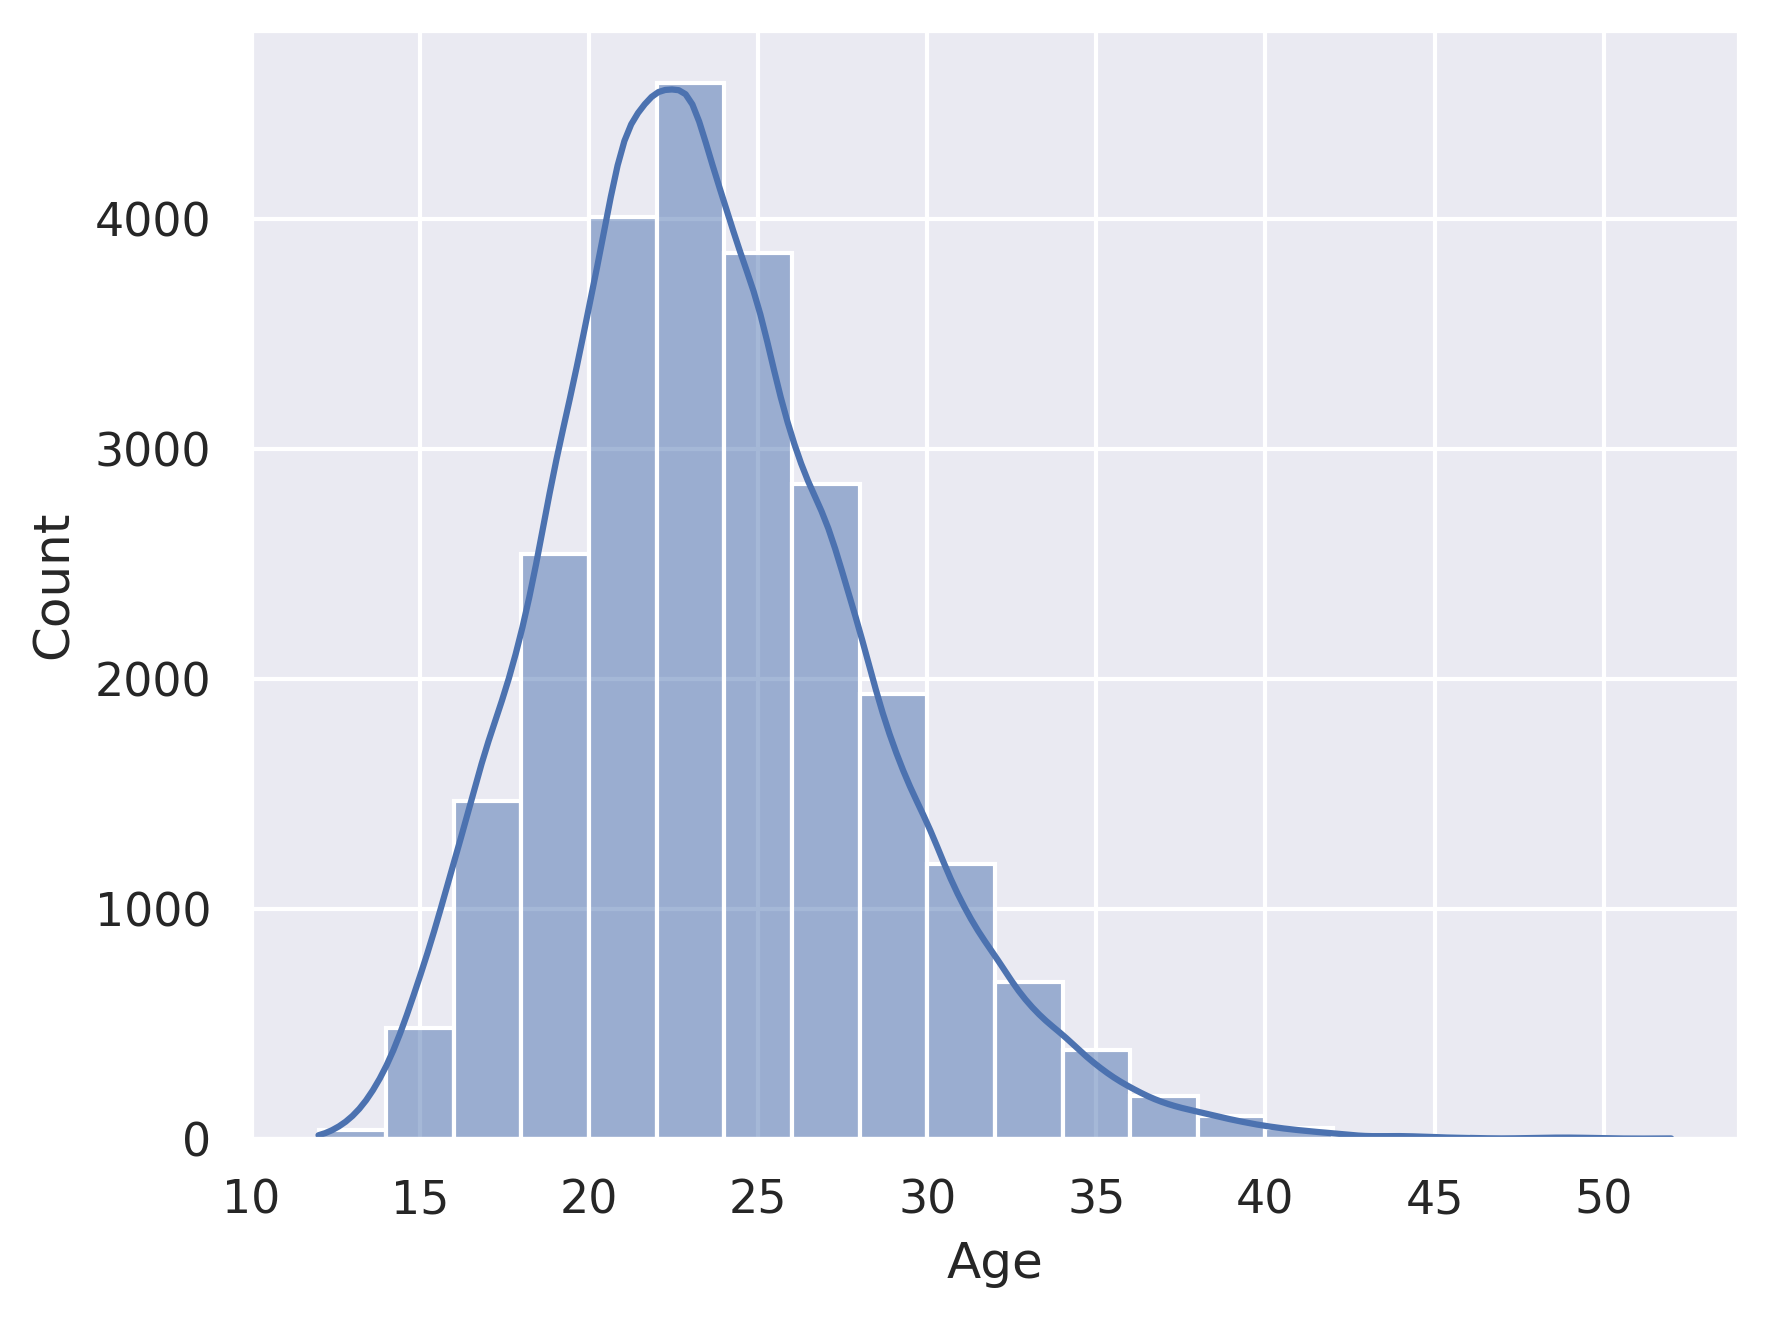

In [0]:
sns.histplot(data = df, x = 'Age', binwidth = 2, kde = True)


### Height

We can notice that the distribution is multimodal and all the peaks are almost centered.

<AxesSubplot:xlabel='Height', ylabel='Count'>

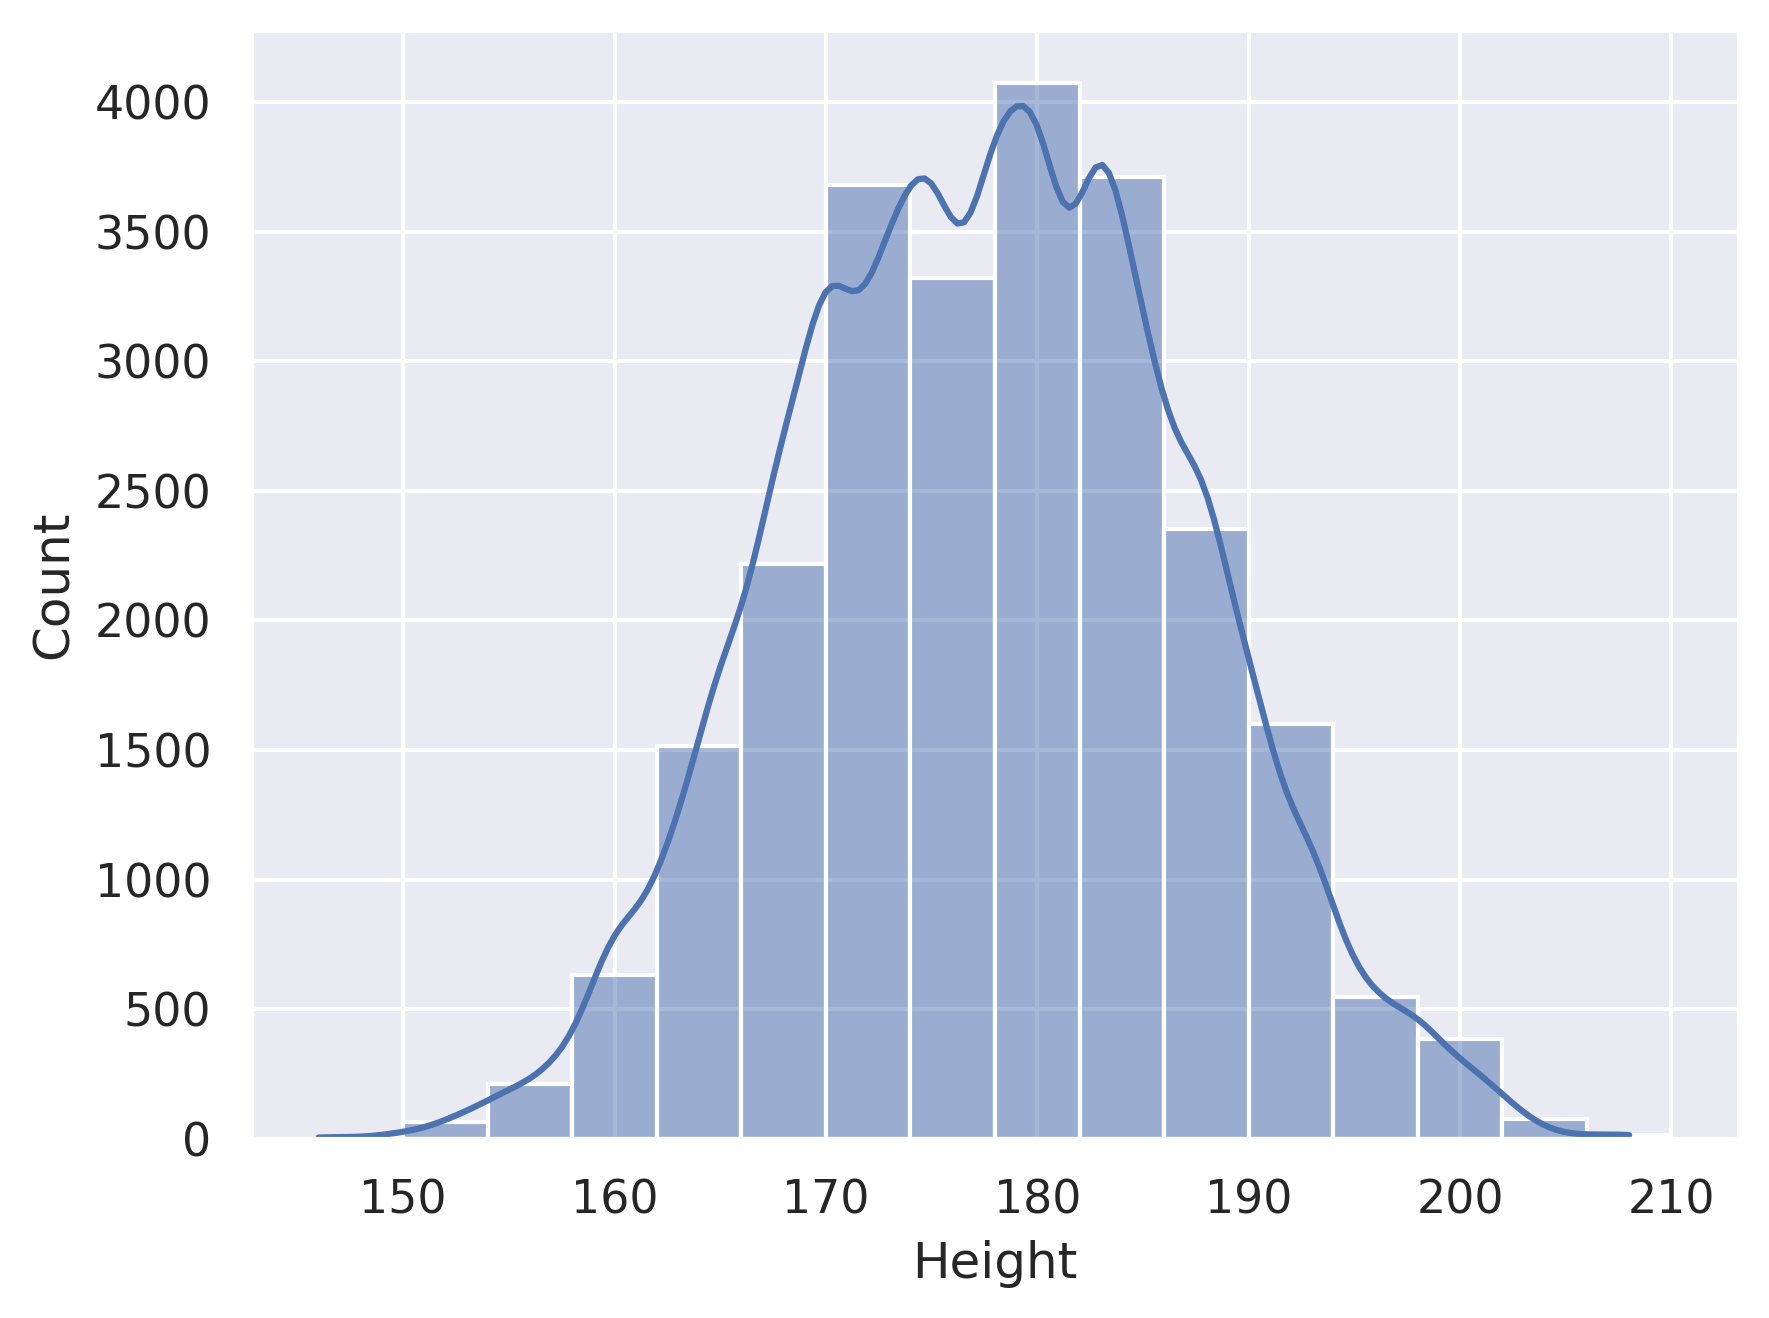

In [0]:
sns.histplot(data = df, x = 'Height', binwidth = 4, kde = True)


### Weight

This distribution is right-skewed and also seems to have multiple peaks.

<AxesSubplot:xlabel='Weight', ylabel='Count'>

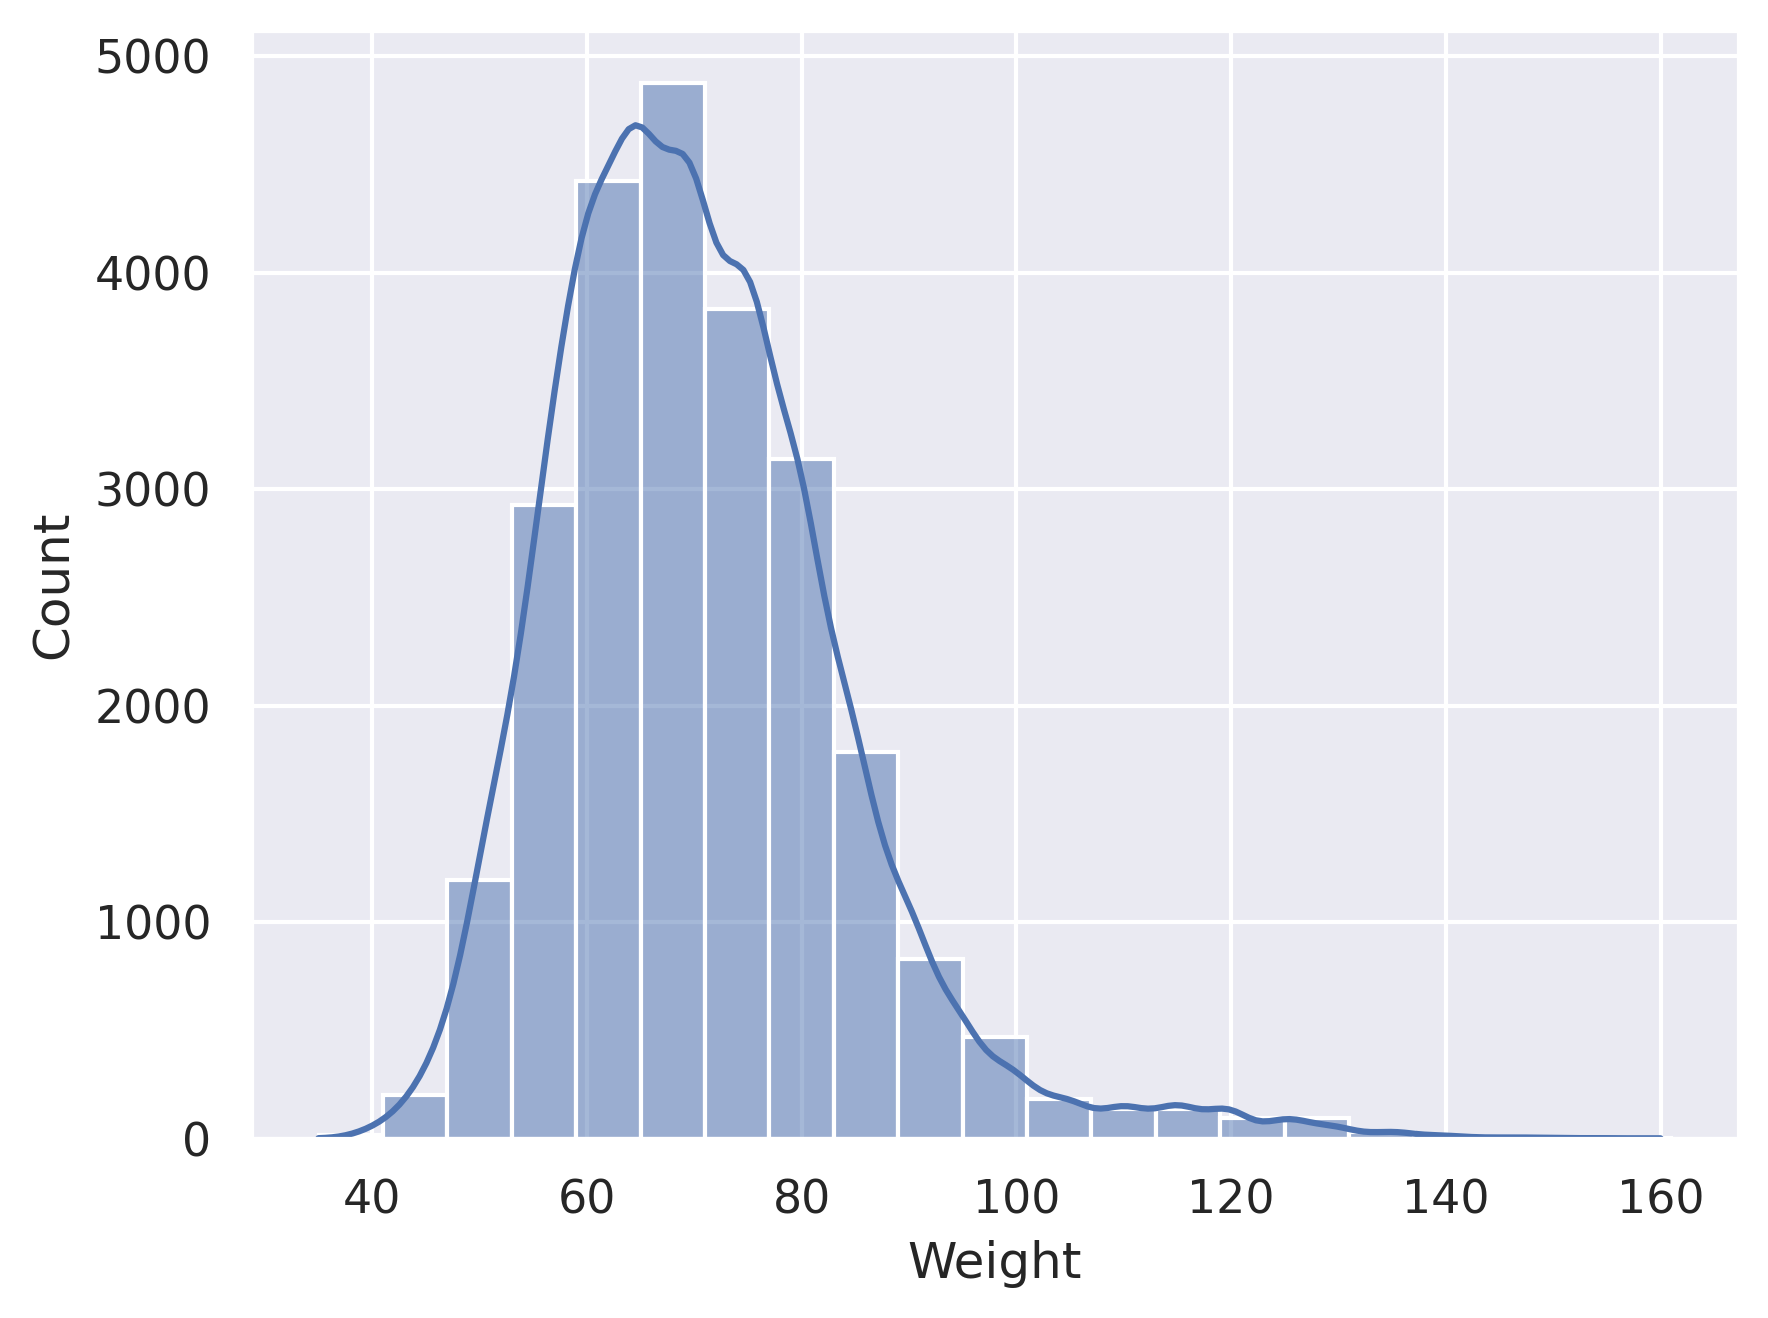

In [0]:
sns.histplot(data = df, x = 'Weight', binwidth = 6, kde = True)


## Data Exploration


We try to provide insights to the proposed questions and hypothesis:

1. What is the distribution of medals across different countries and sports?
2. How does the distribution of athlete heights and weights vary across different sports?
3. Can we identify any significant correlations between athletes' ages and their performance (medals won) in various events?
4. What relevant health and fitness insights can be derived from the analysis of athletes' age, height, weight, and performance?  

The hypothesis are the following:
* The USA has more participants than other countries. Therefore, it is highly probable that it has more medals than other countries in most of the sports.
* Due to the requirements for specific activities realized in each sport, athletes’ height and weight are different across the sports.
* Age has been an important factor. I want to prove if younger people tend to perform better than older people across different sports, no matter the country.
* There is a correlation between age, height, and weight with the performance of the athletes.


We take a look at the distribution of participants eaach year in the Summer Olympics.  
From this graph, we can see a tendency where the number of participants increases each year.

<AxesSubplot:xlabel='Year', ylabel='count'>

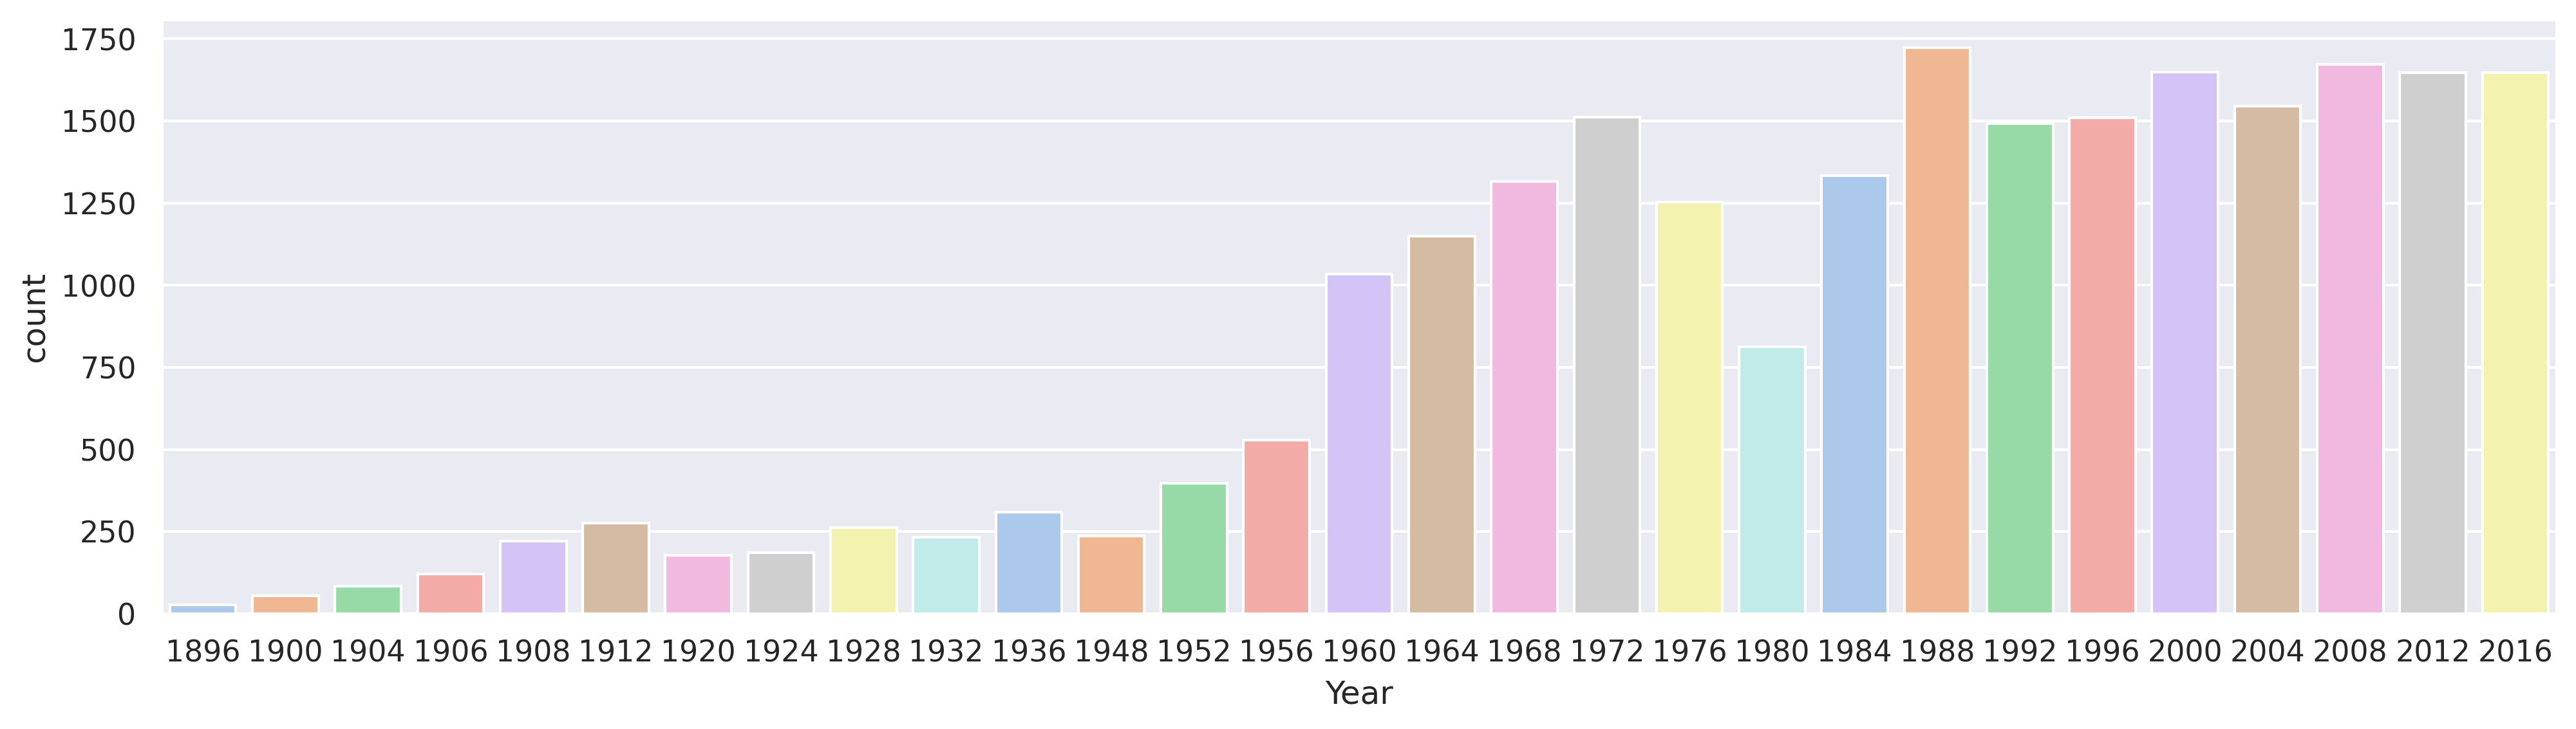

In [0]:
plt.figure(figsize=(16, 4))
sns.countplot(data = df, x = 'Year', palette = colors)


We are selecting the 10 countries with most avialable data.

Text(0, 0.5, 'Total athletes')

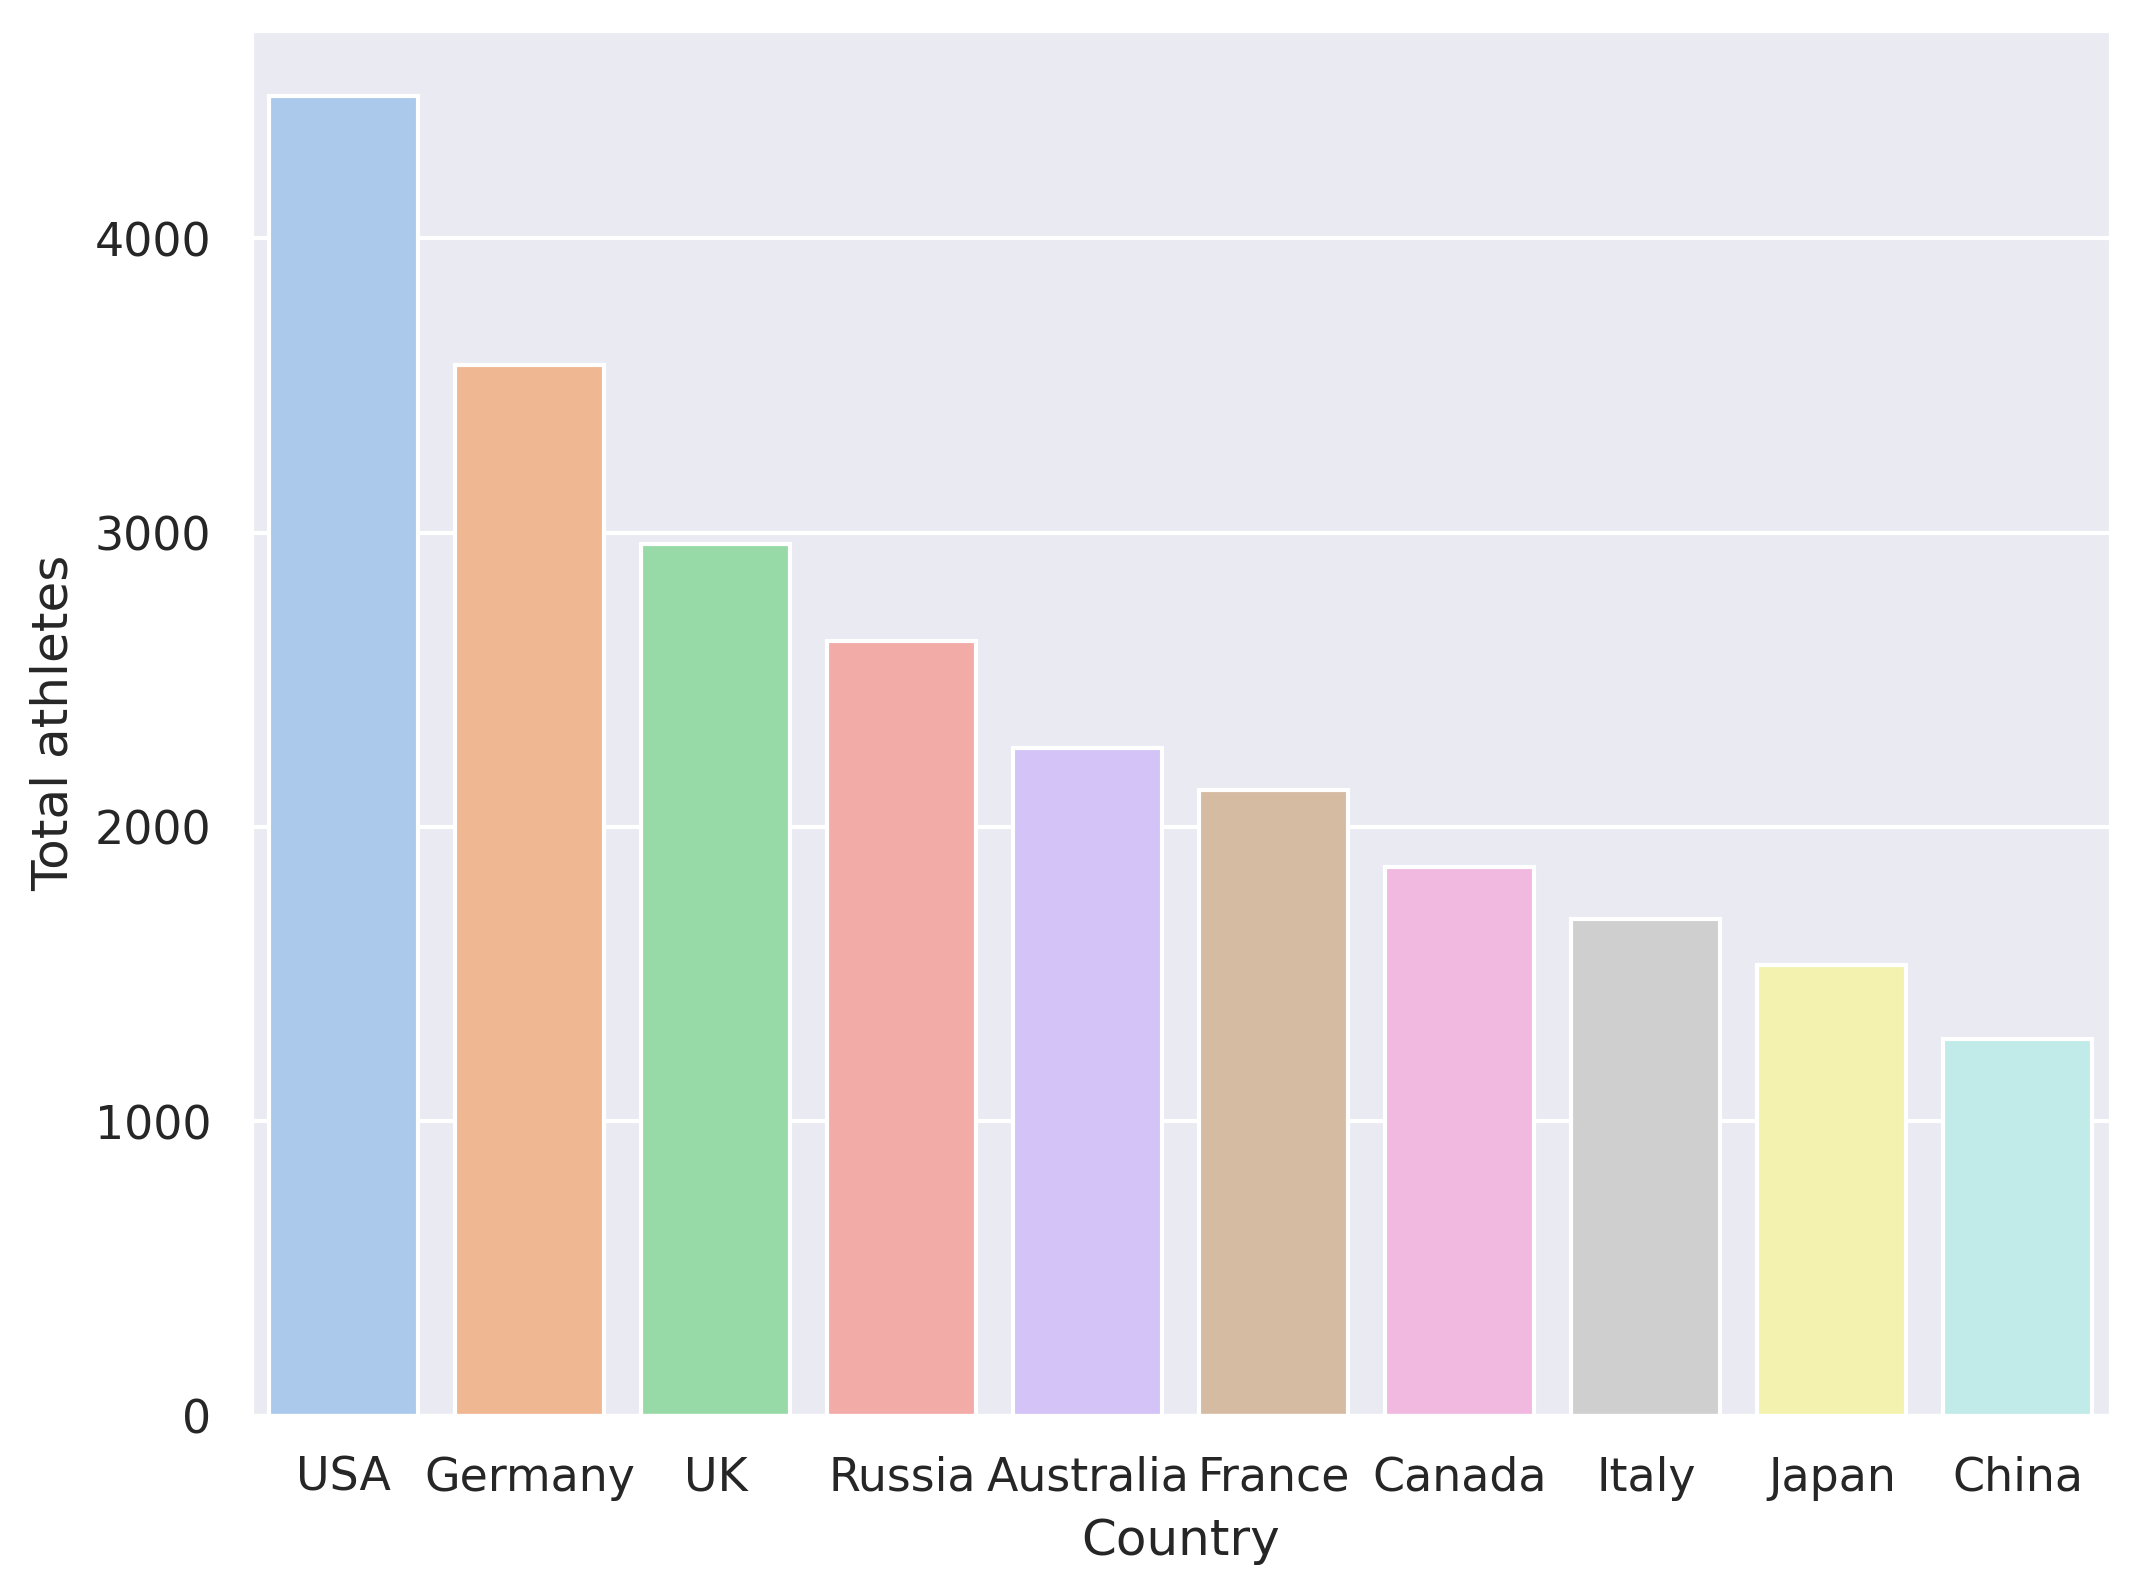

In [0]:
athletes_per_country = pysqldf('SELECT Country, COUNT(*) AS Count FROM df GROUP BY Country ORDER BY Count DESC LIMIT 10;')

plt.figure(figsize=(8, 6))
sns.barplot(data = athletes_per_country, x = 'Country', y = 'Count', palette = colors)
plt.ylabel('Total athletes')


These 10 countries have the most available data. Now lets see how many medals have each of them.

<AxesSubplot:xlabel='Country', ylabel='Medals'>

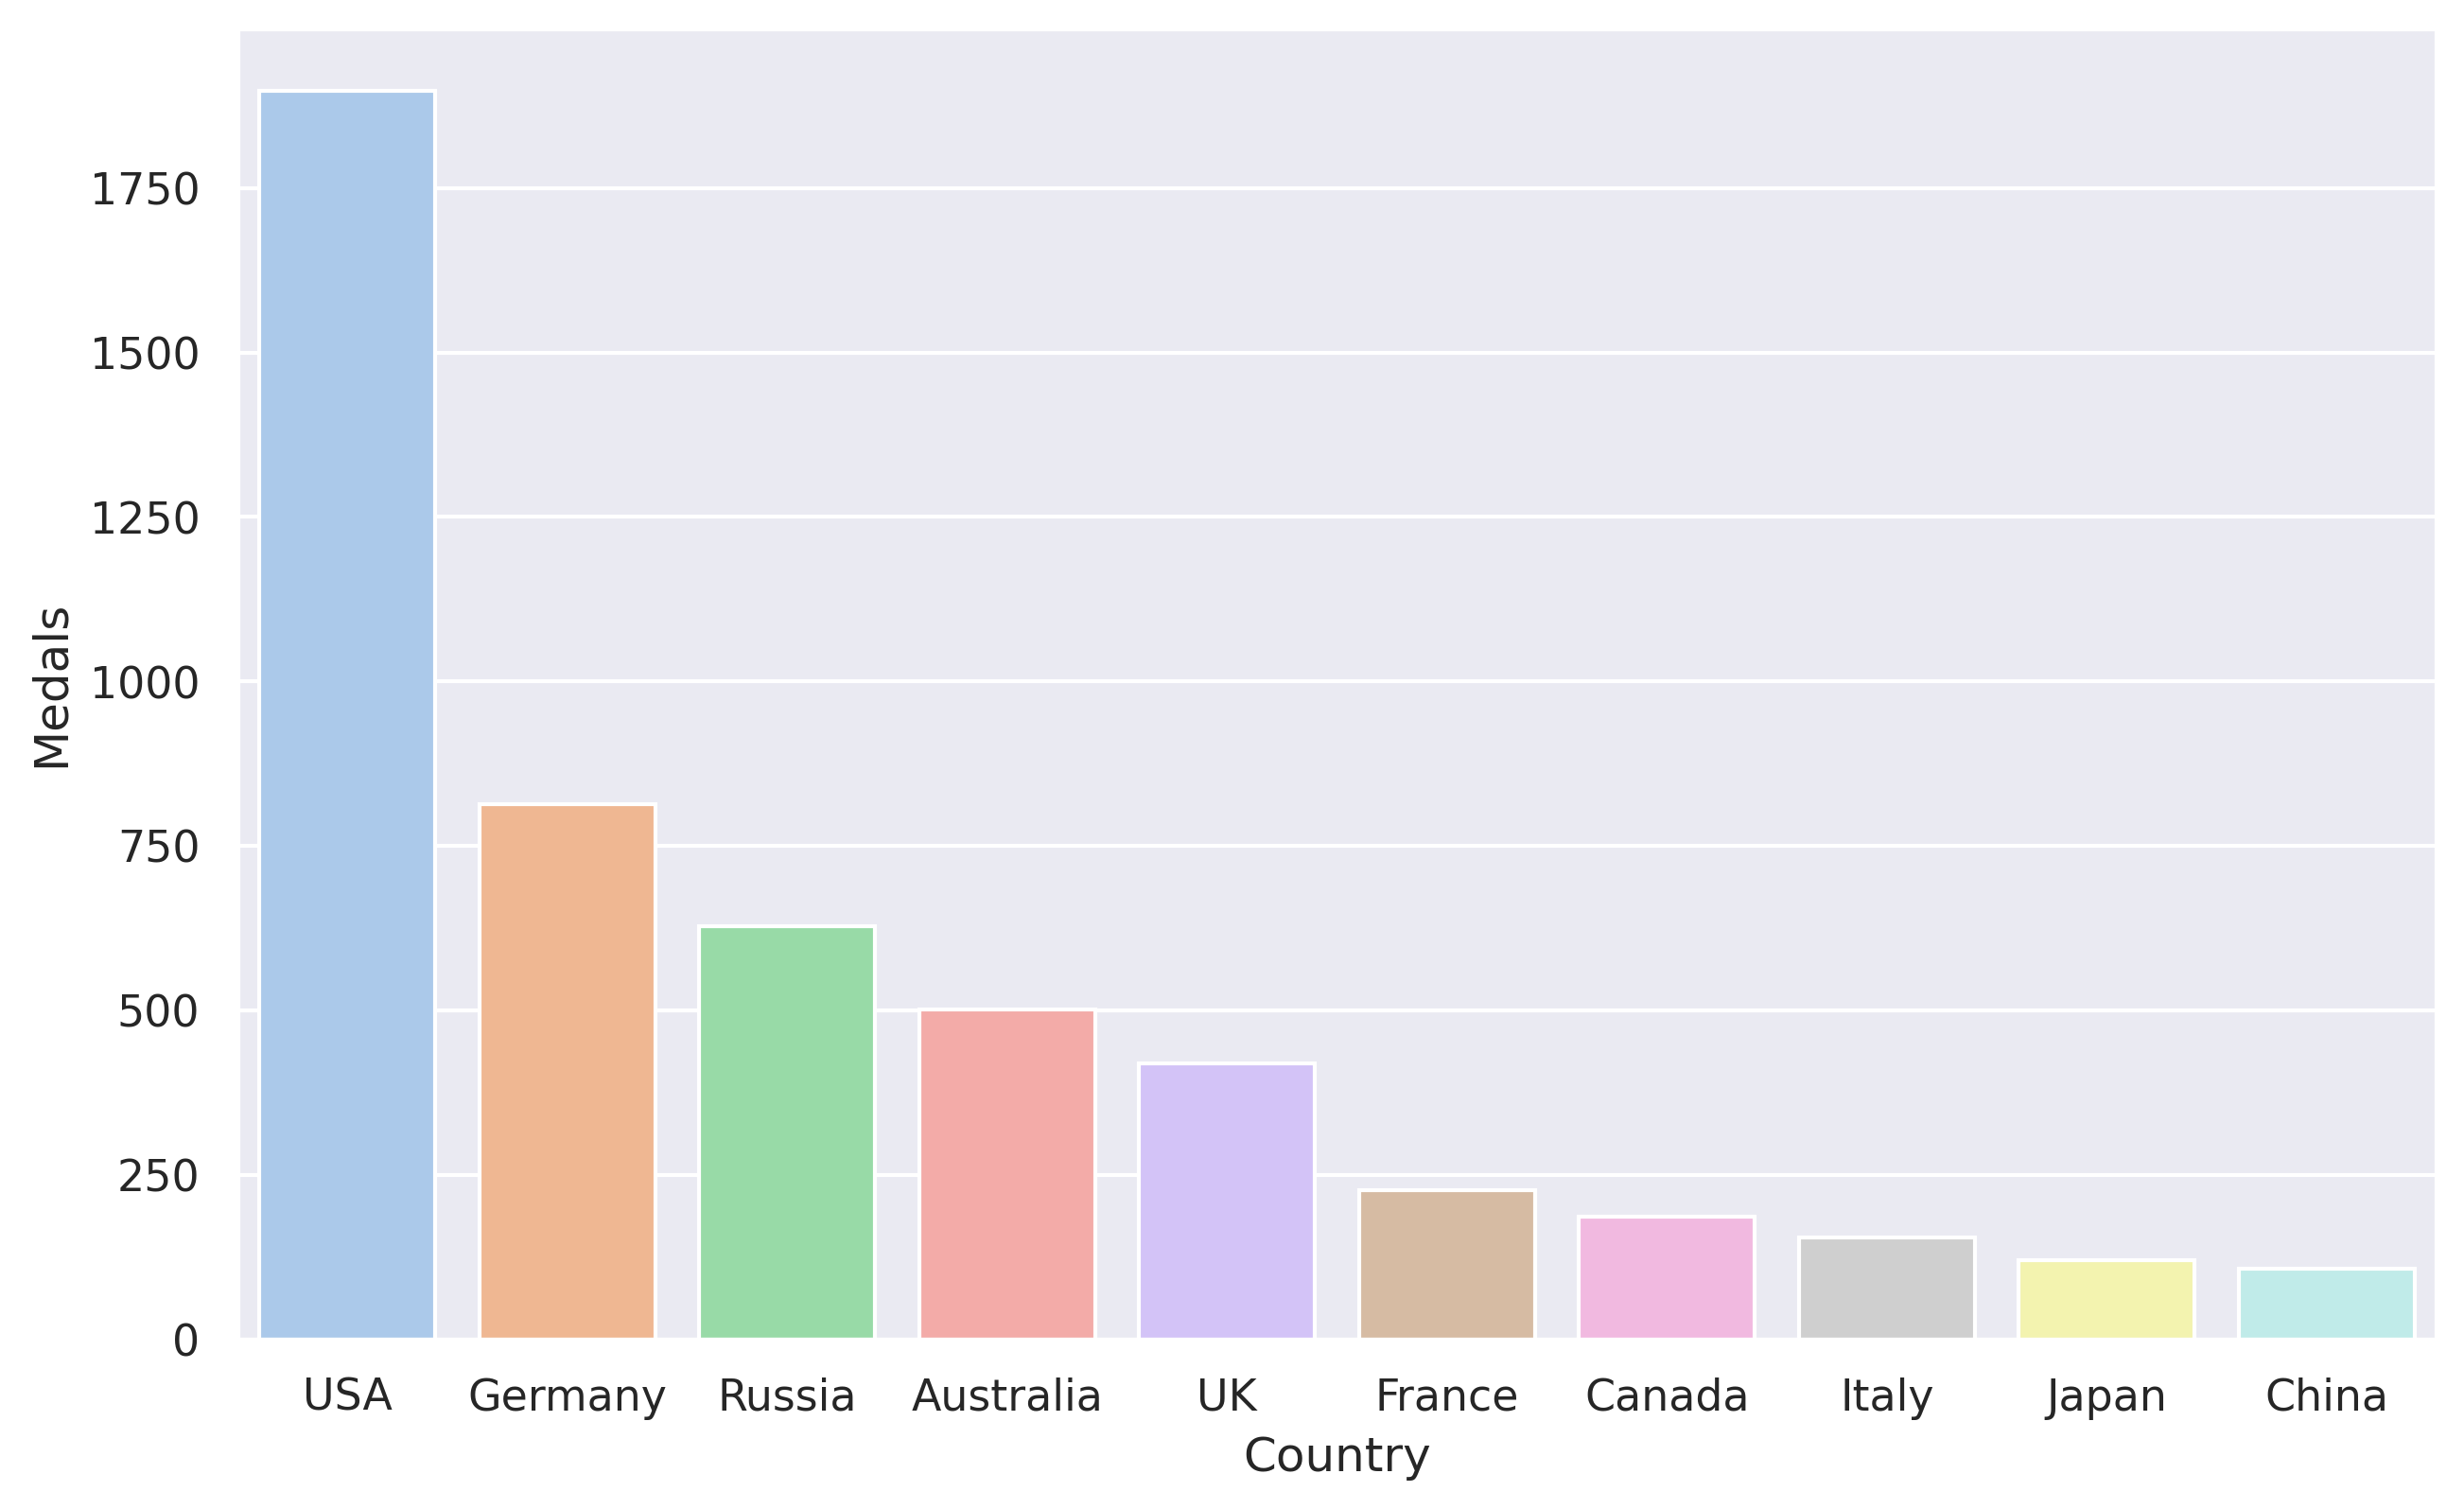

In [0]:
top_medalists = pysqldf("SELECT Country, SUM (CASE WHEN Medal = 'NA' THEN 0 ELSE 1 END) AS Medals FROM df GROUP BY Country ORDER BY Medals DESC LIMIT 10;")

plt.figure(figsize=(10, 6))
sns.barplot(data = top_medalists, x = 'Country', y = 'Medals', palette = colors)


It seems that there is a relation between the number of participants and the number of medals. There is only a slight change where the UK descends two places in the number of medals obtanied.


### Distribution of medals across different countries and sports


We selected Athletics, Swimming, and Cycling, and the top 10 countries with more participants.

In [0]:
# Function to plot the Medals won for each country for a specific sport.
def medalist_per_sport(sport):
    df_sports = pysqldf(f"""SELECT
                                Country,
                                SUM (
                                    CASE
                                        WHEN Medal = 'NA' THEN 0
                                        ELSE 1
                                        END
                                    ) AS Medals
                            FROM df
                            WHERE 
                                Sport = '{sport}'
                            GROUP BY Country
                            ORDER BY Medals DESC
                            LIMIT 10;""")
    
    plt.figure(figsize=(10, 6))
    sns.barplot(data = df_sports, x = 'Country', y = 'Medals', palette = colors)
    plt.title(f'{sport}')

    #return df_sports

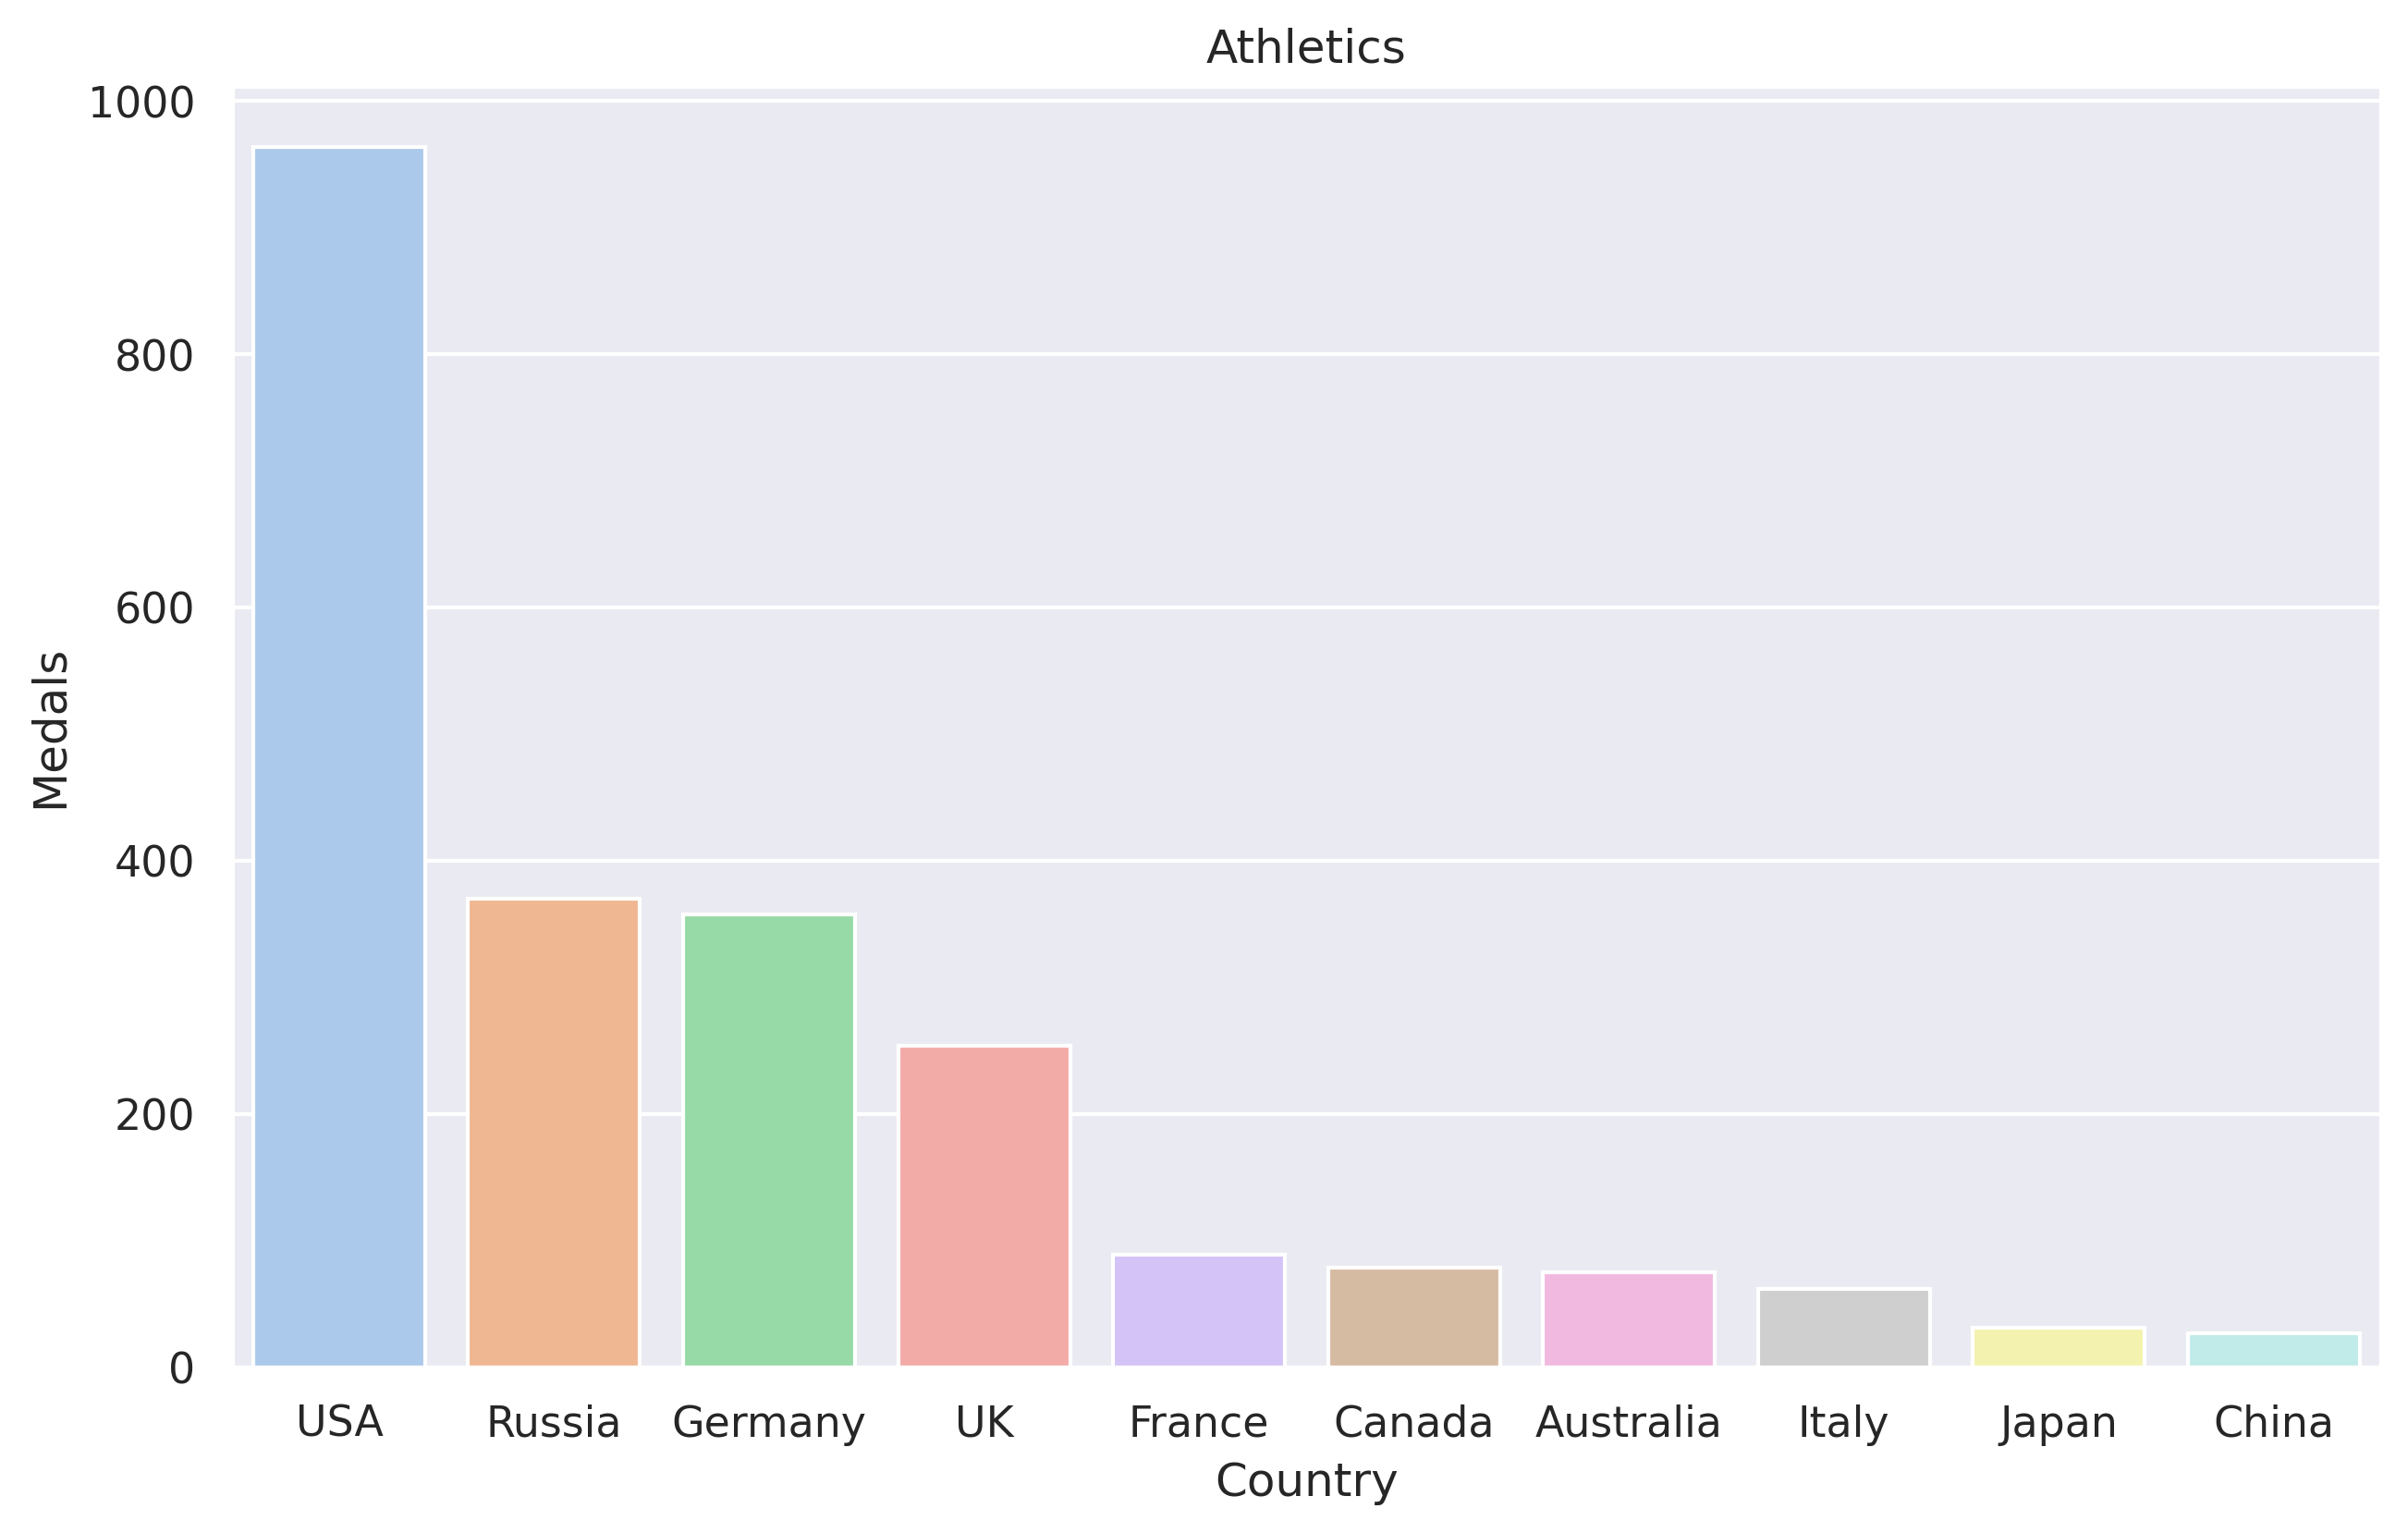

In [0]:
medalist_per_sport('Athletics')

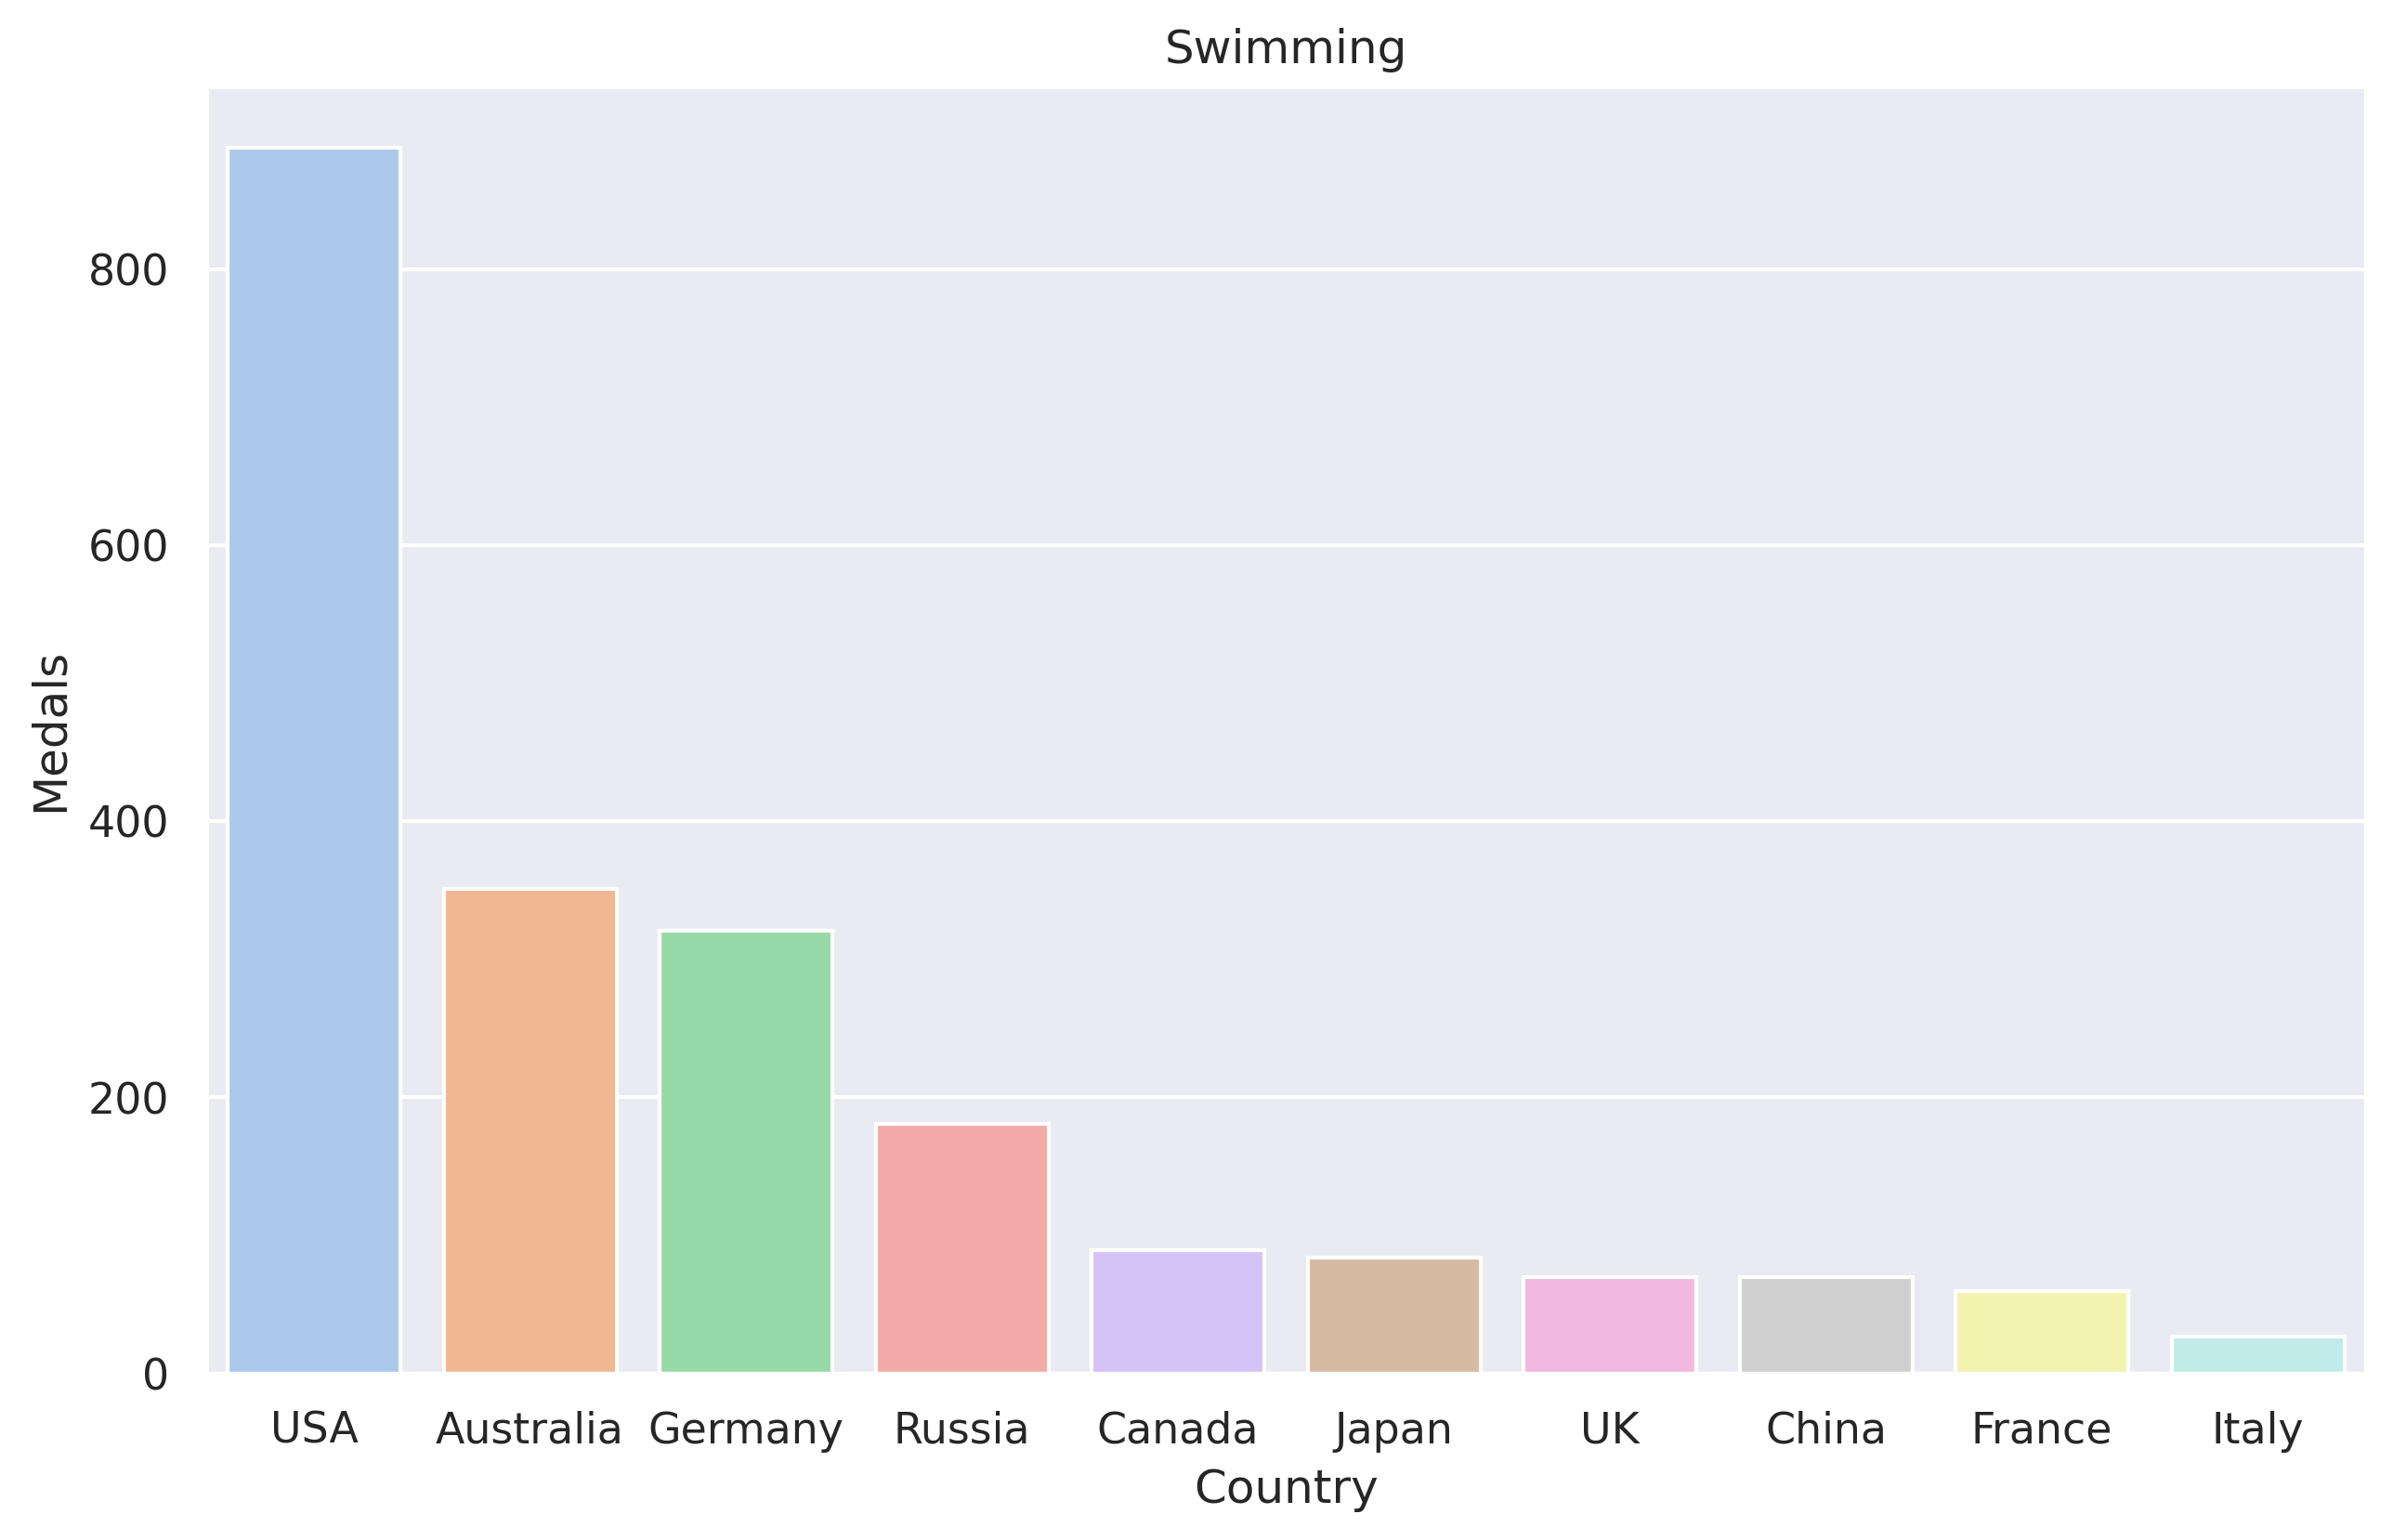

In [0]:
medalist_per_sport('Swimming')

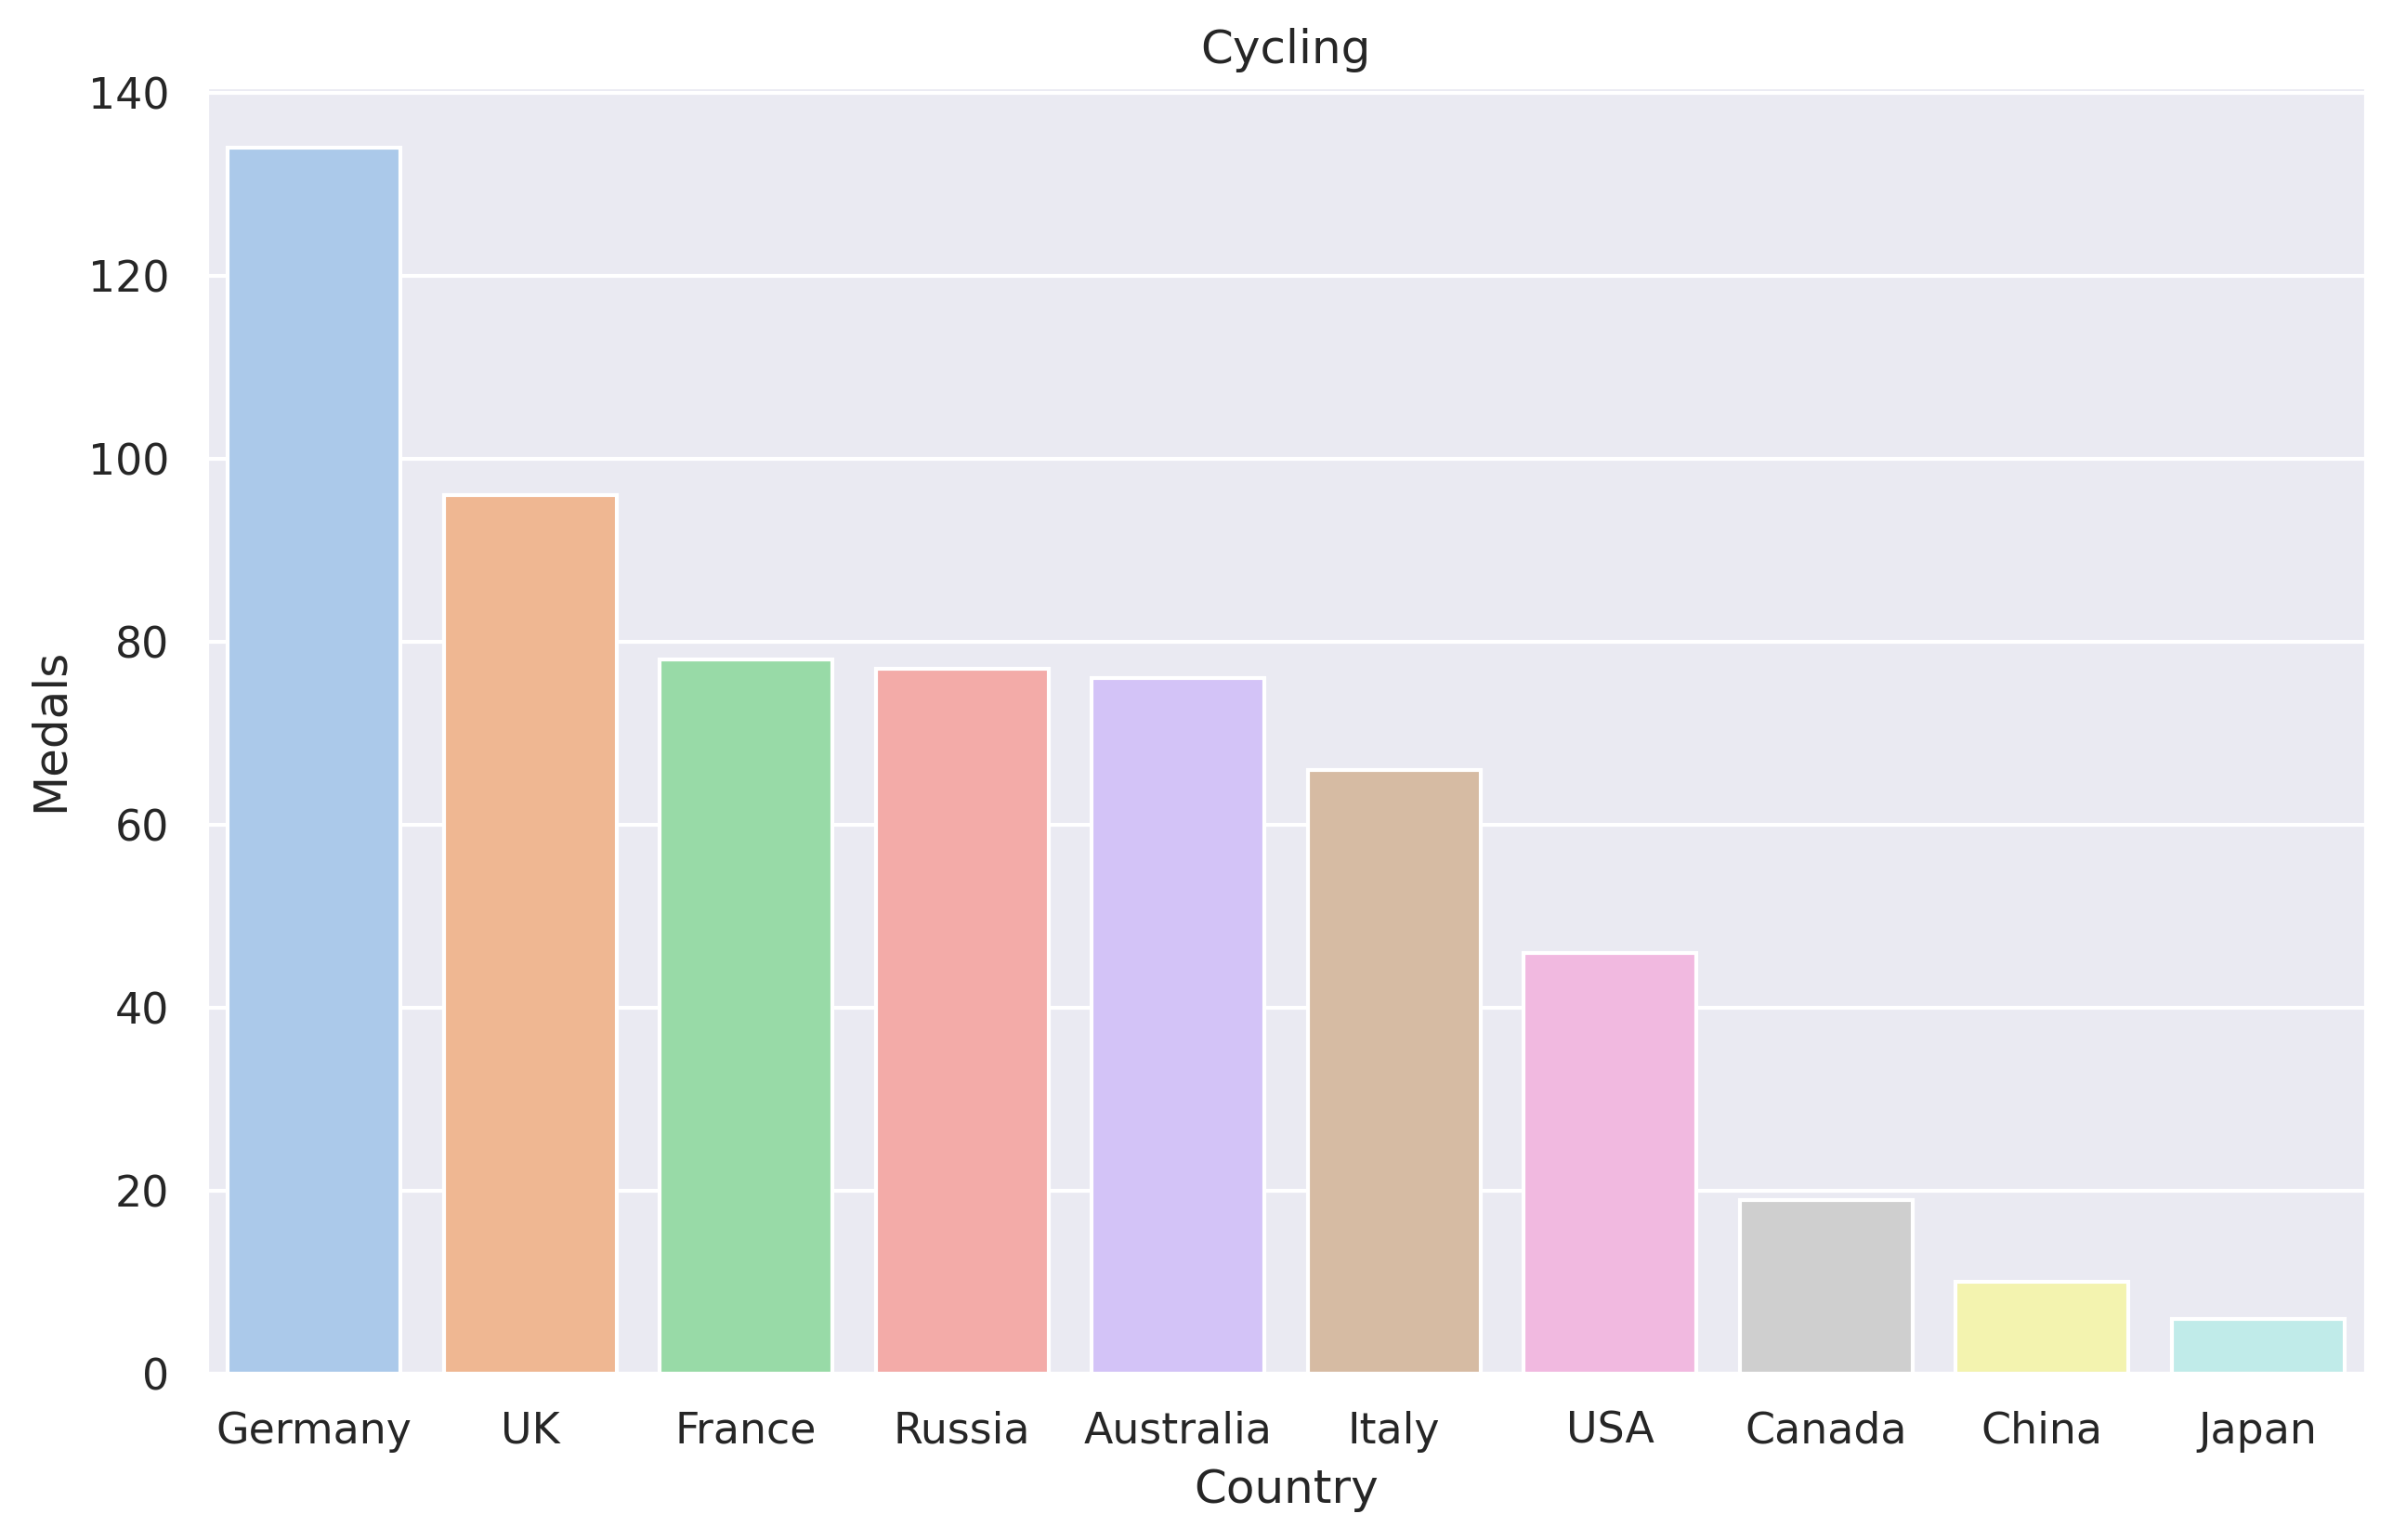

In [0]:
medalist_per_sport('Cycling')


The USA is notably the top performer in two of the three sports considered.


### Age, heights, and weights across different sports

In [0]:
df.describe().iloc[:, 1:4]

,Age,Height,Weight
count,24407.000000,24407.000000,24407.000000
mean,23.584545,177.734379,70.541894
std,4.673163,9.313547,13.688611
min,12.000000,146.000000,35.000000
25%,20.000000,171.000000,61.000000
50%,23.000000,178.000000,69.000000
75%,26.000000,184.000000,78.000000
max,52.000000,208.000000,160.000000



### Age

The age for each sport seems to be different. Younger athletes compete in the swimming sports, while athletics seem to have the oldest athletes. We need to see if these differences are significant.

<AxesSubplot:xlabel='Sport', ylabel='Age'>

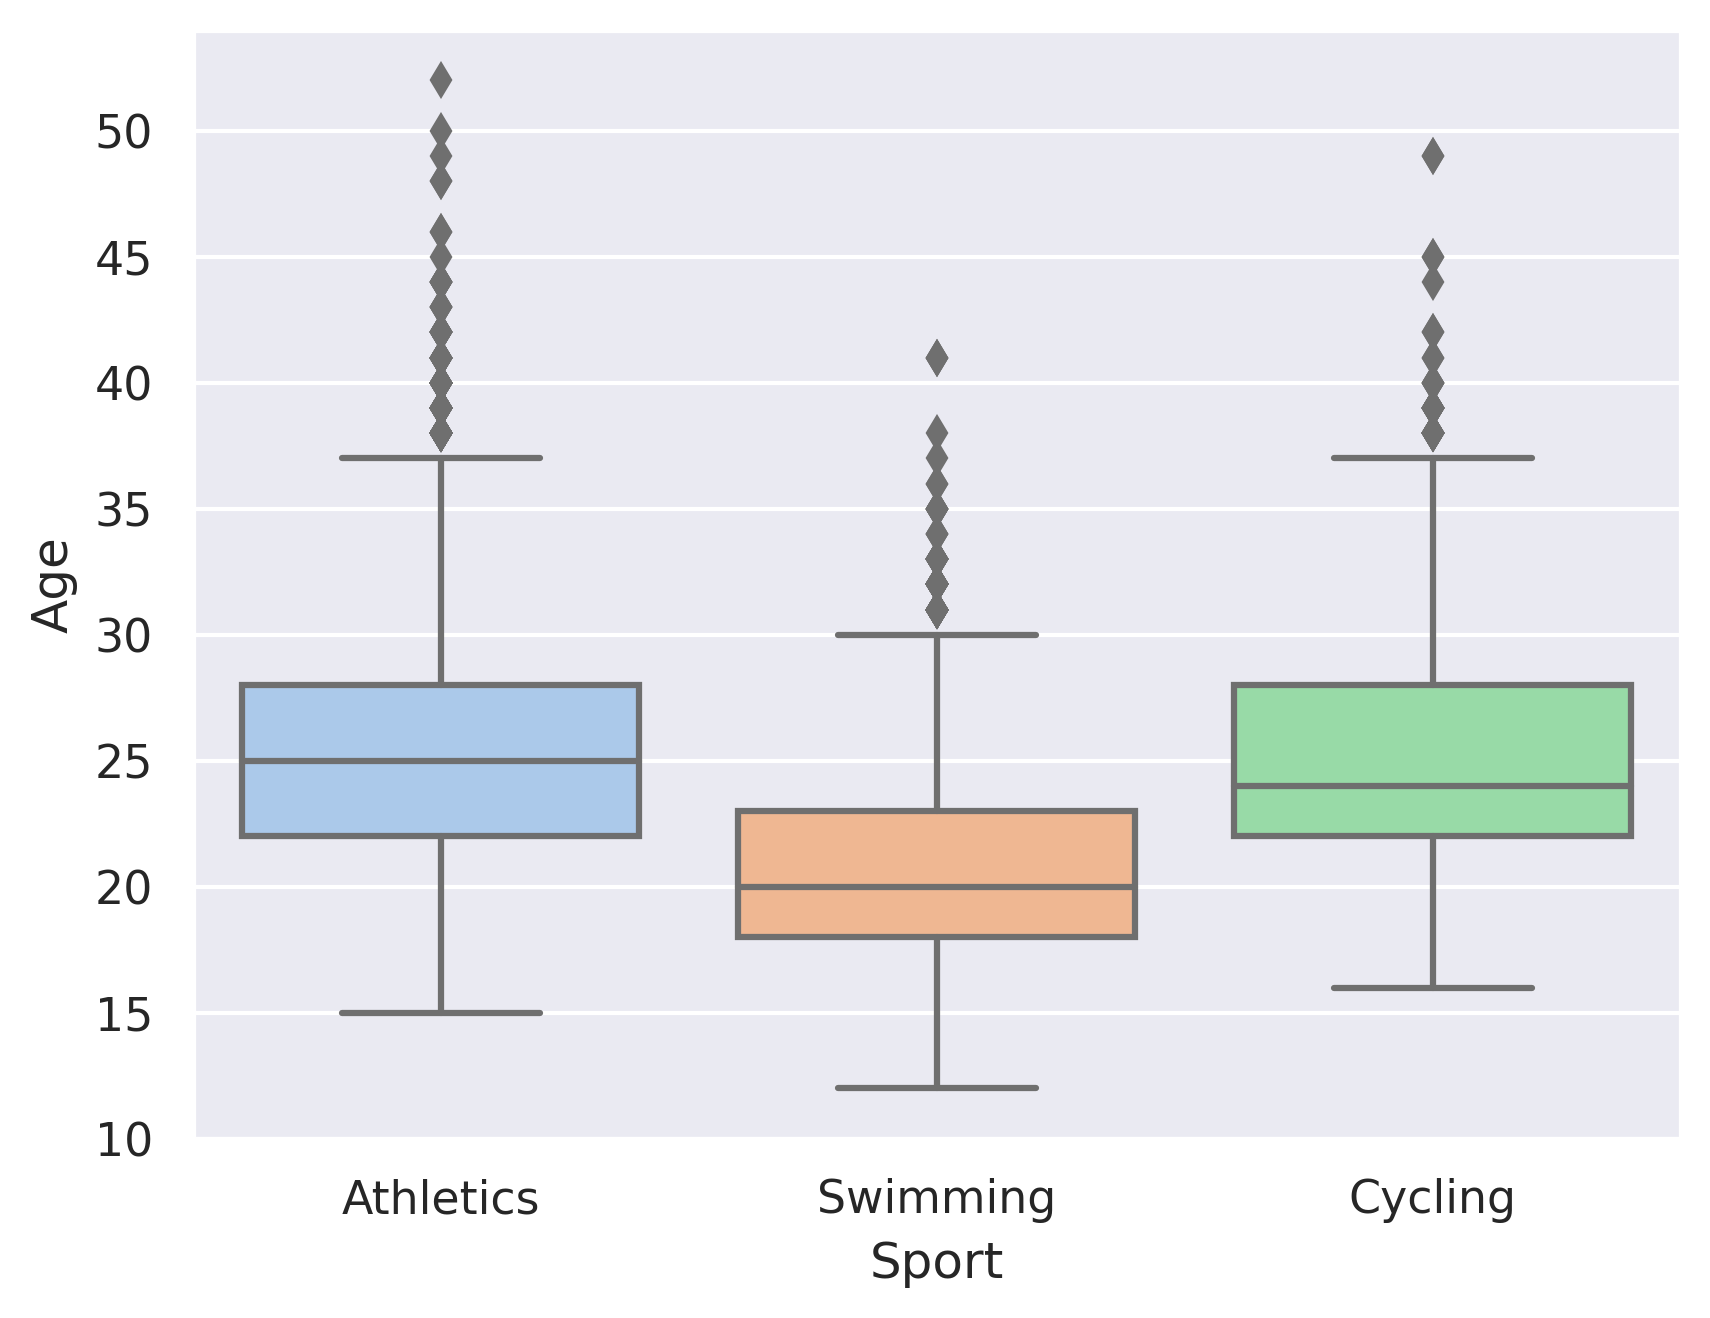

In [0]:
sns.boxplot(data = df, x = 'Sport', y = 'Age', order = ['Athletics', 'Swimming', 'Cycling'], palette = colors)


### Height

Swimming athletes are the tallest. While cyclist are the shortest. Does it represent an adavantage in each sport?  

<AxesSubplot:xlabel='Sport', ylabel='Height'>

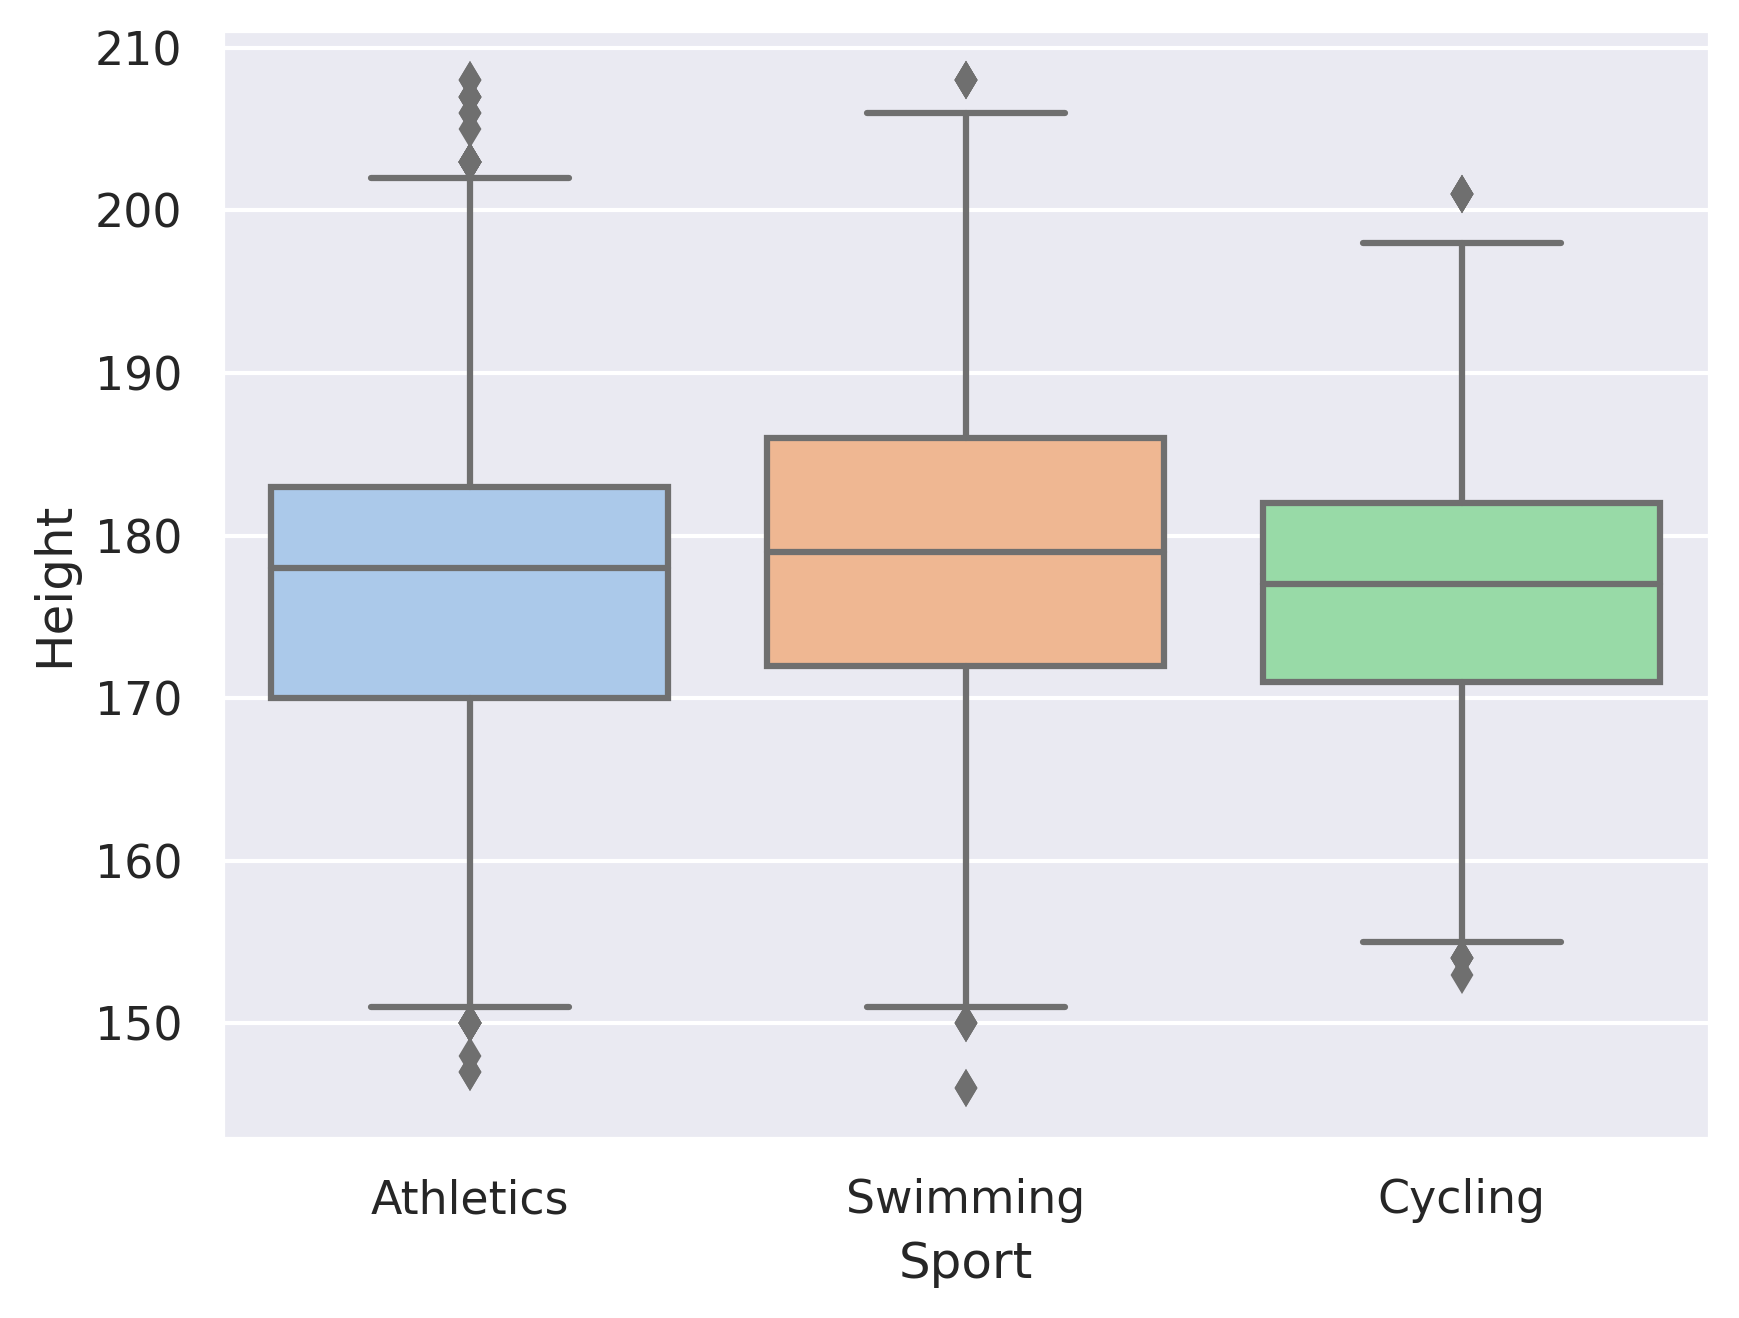

In [0]:
sns.boxplot(data = df, x = 'Sport', y = 'Height', order = ['Athletics', 'Swimming', 'Cycling'], palette = colors)


### Weight

All the medians are almost the same. Could we refute an hypothesis claiming that there is no significant difference in the weight?  
Having almost the same weight might indicate a reduced Body Mass Index for swimmers and higher for cyclists. We could calculate this new metric and analyze it too.

<AxesSubplot:xlabel='Sport', ylabel='Weight'>

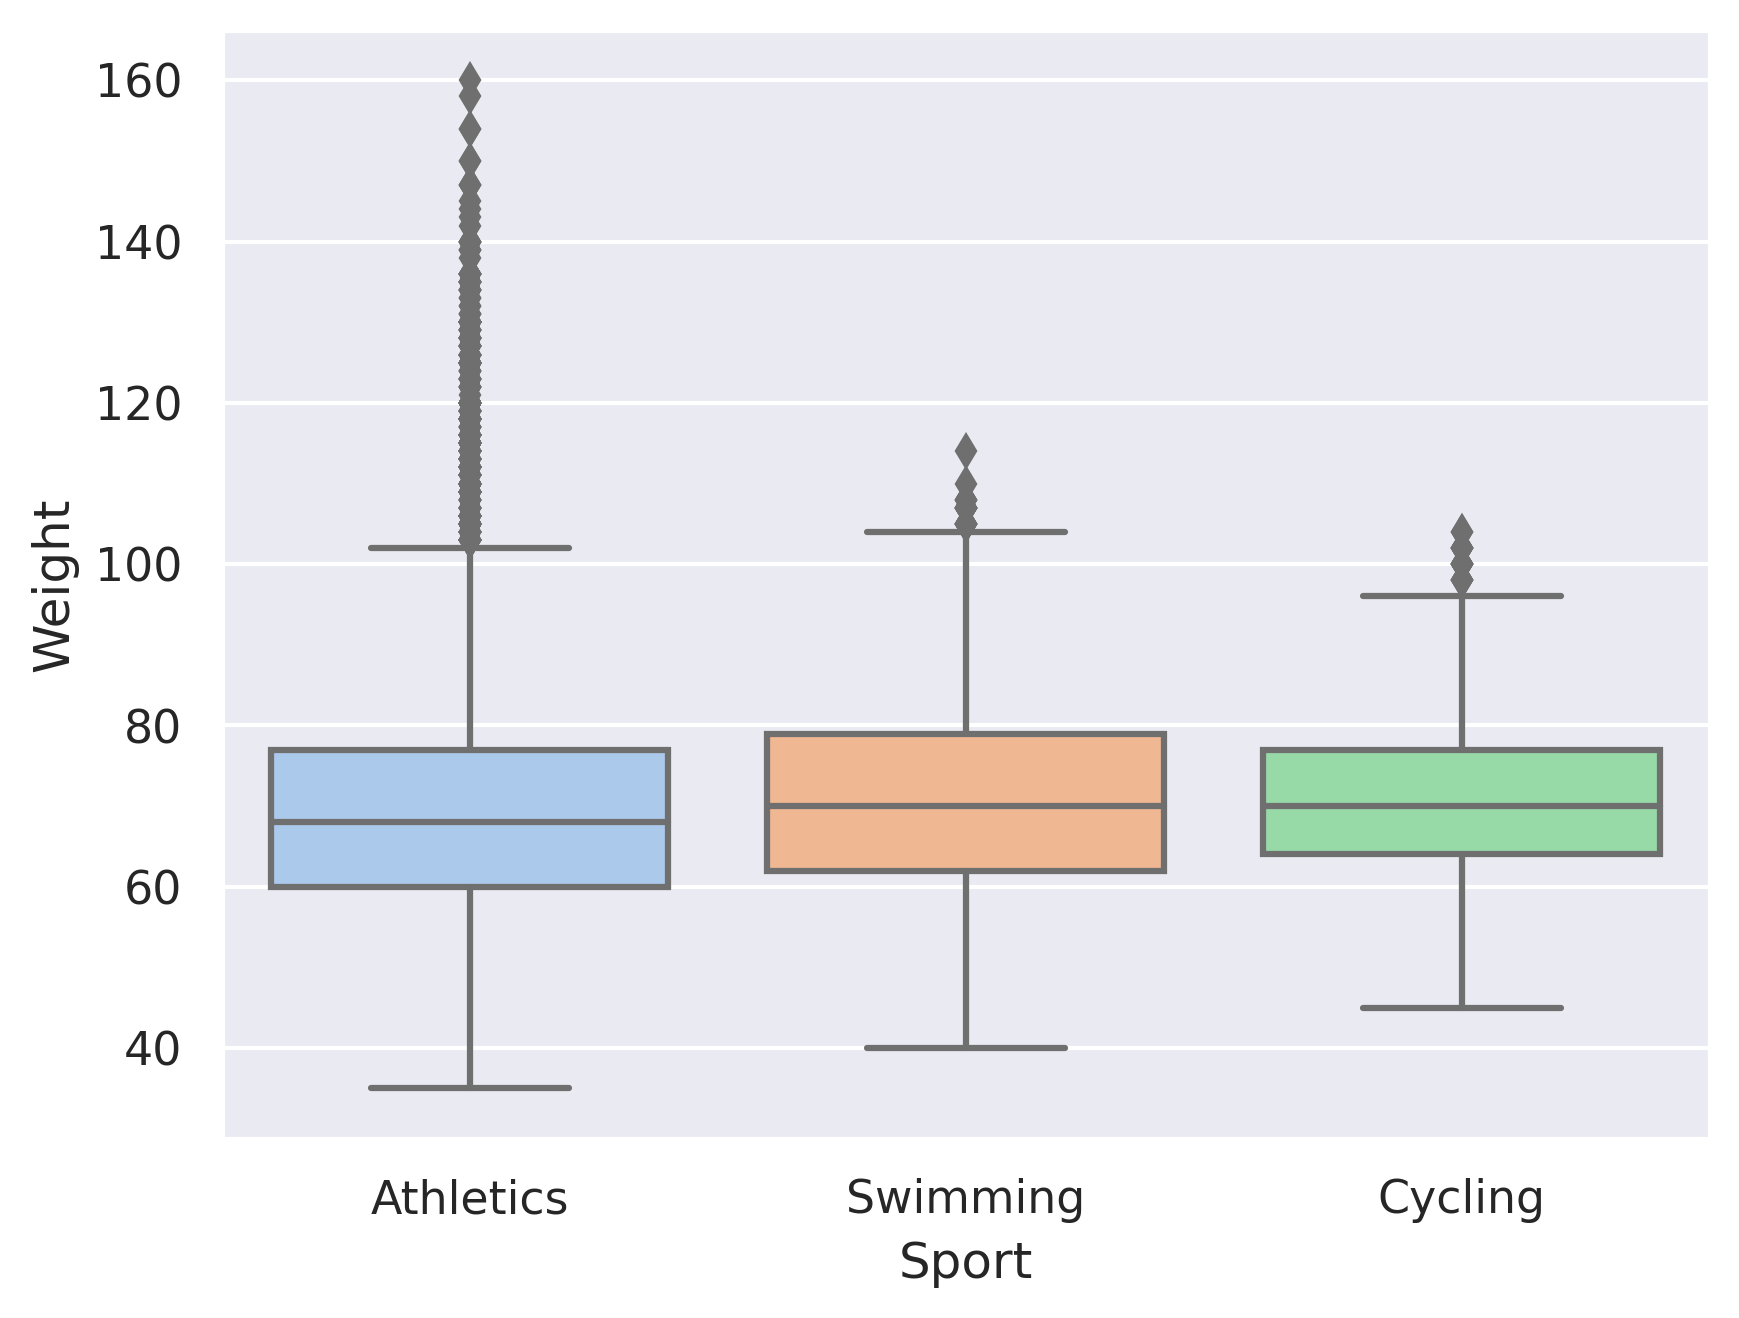

In [0]:
sns.boxplot(data = df, x = 'Sport', y = 'Weight', order = ['Athletics', 'Swimming', 'Cycling'], palette = colors)


### Age, heights, and weights: performance


There seems to be no differece between the age and the performance (meassured as the number of medals earned).

<AxesSubplot:xlabel='Medal', ylabel='Age'>

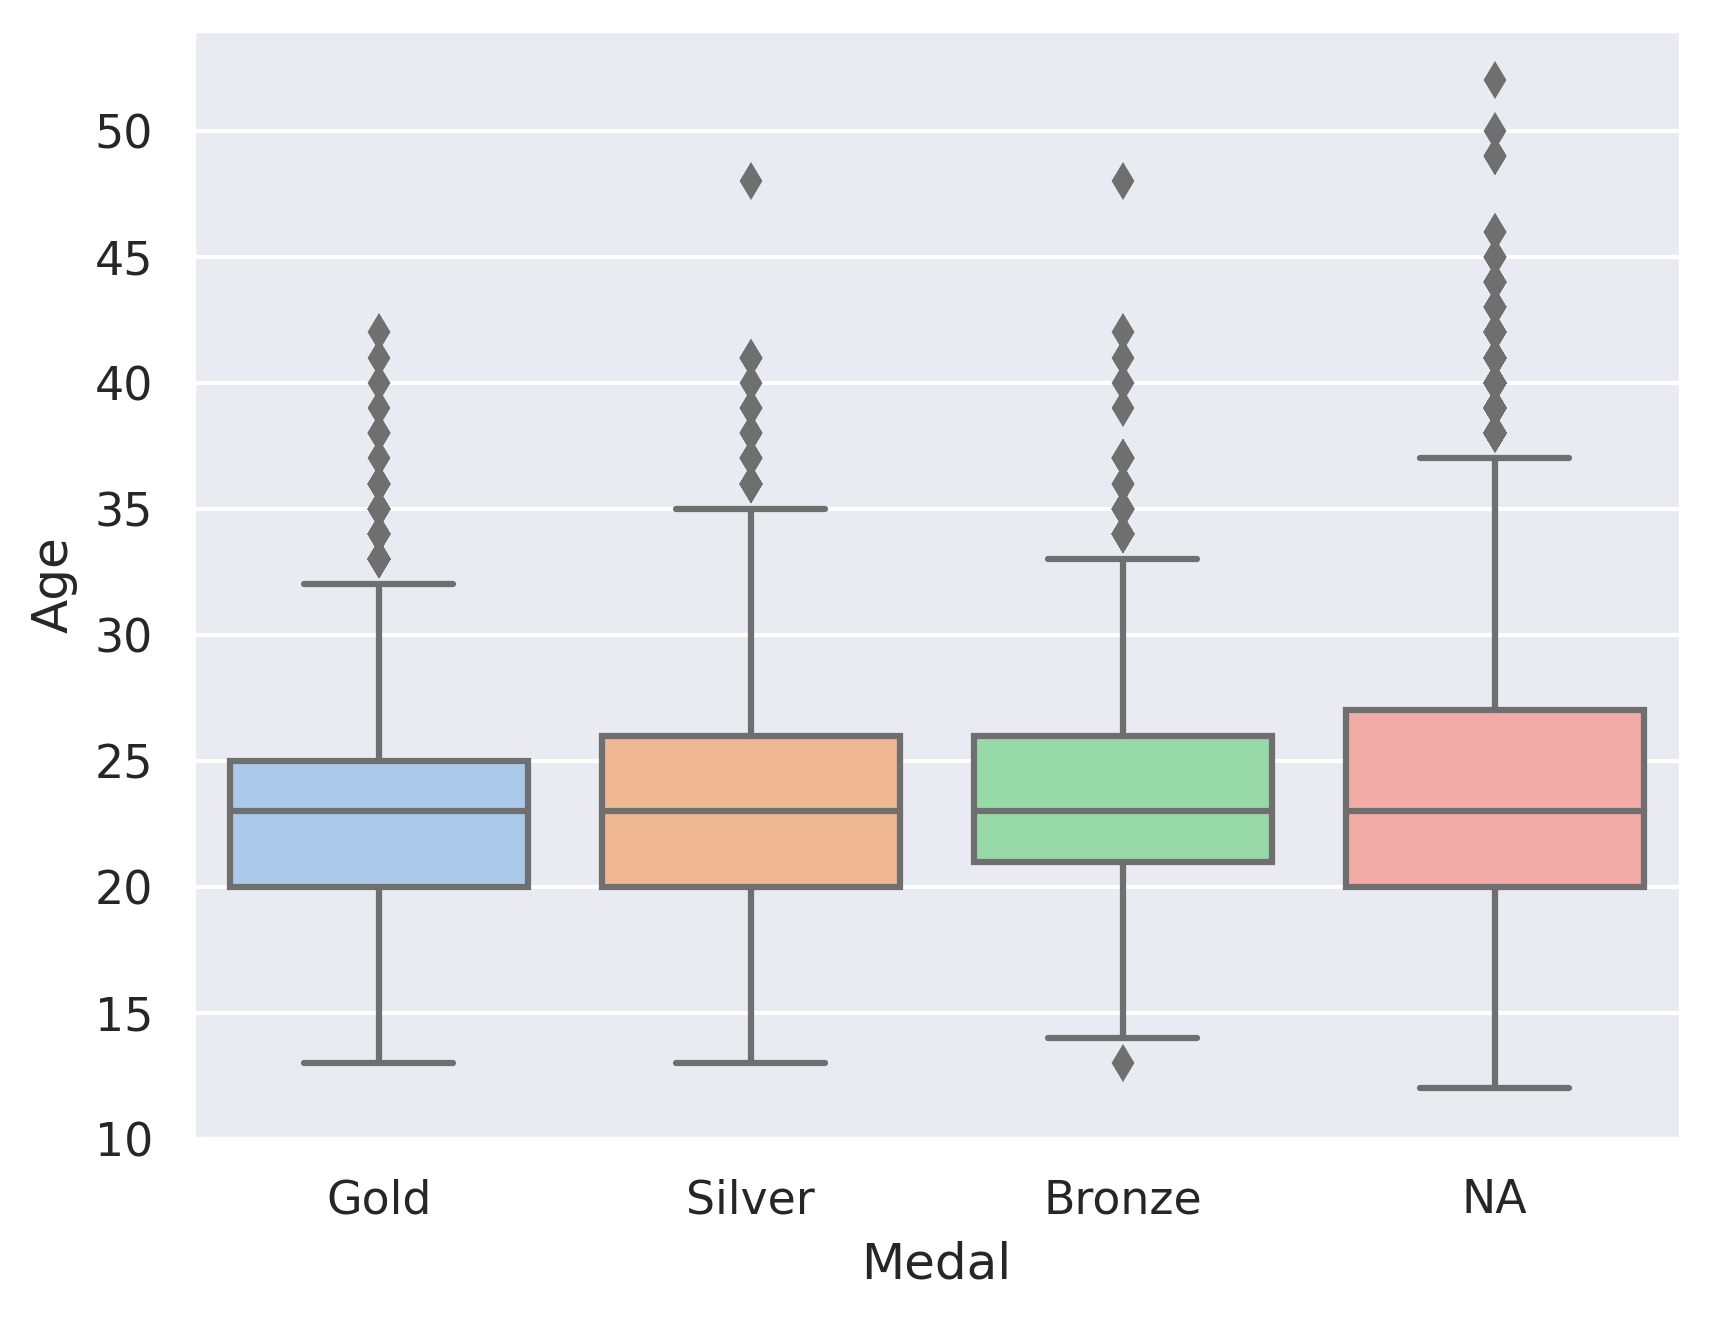

In [0]:
sns.boxplot(data = df, x = 'Medal', y = 'Age', order = ['Gold', 'Silver', 'Bronze', 'NA'], palette = colors)


It seems that taller people have better overall performance. Is there a significant difference among these groups?

<AxesSubplot:xlabel='Medal', ylabel='Height'>

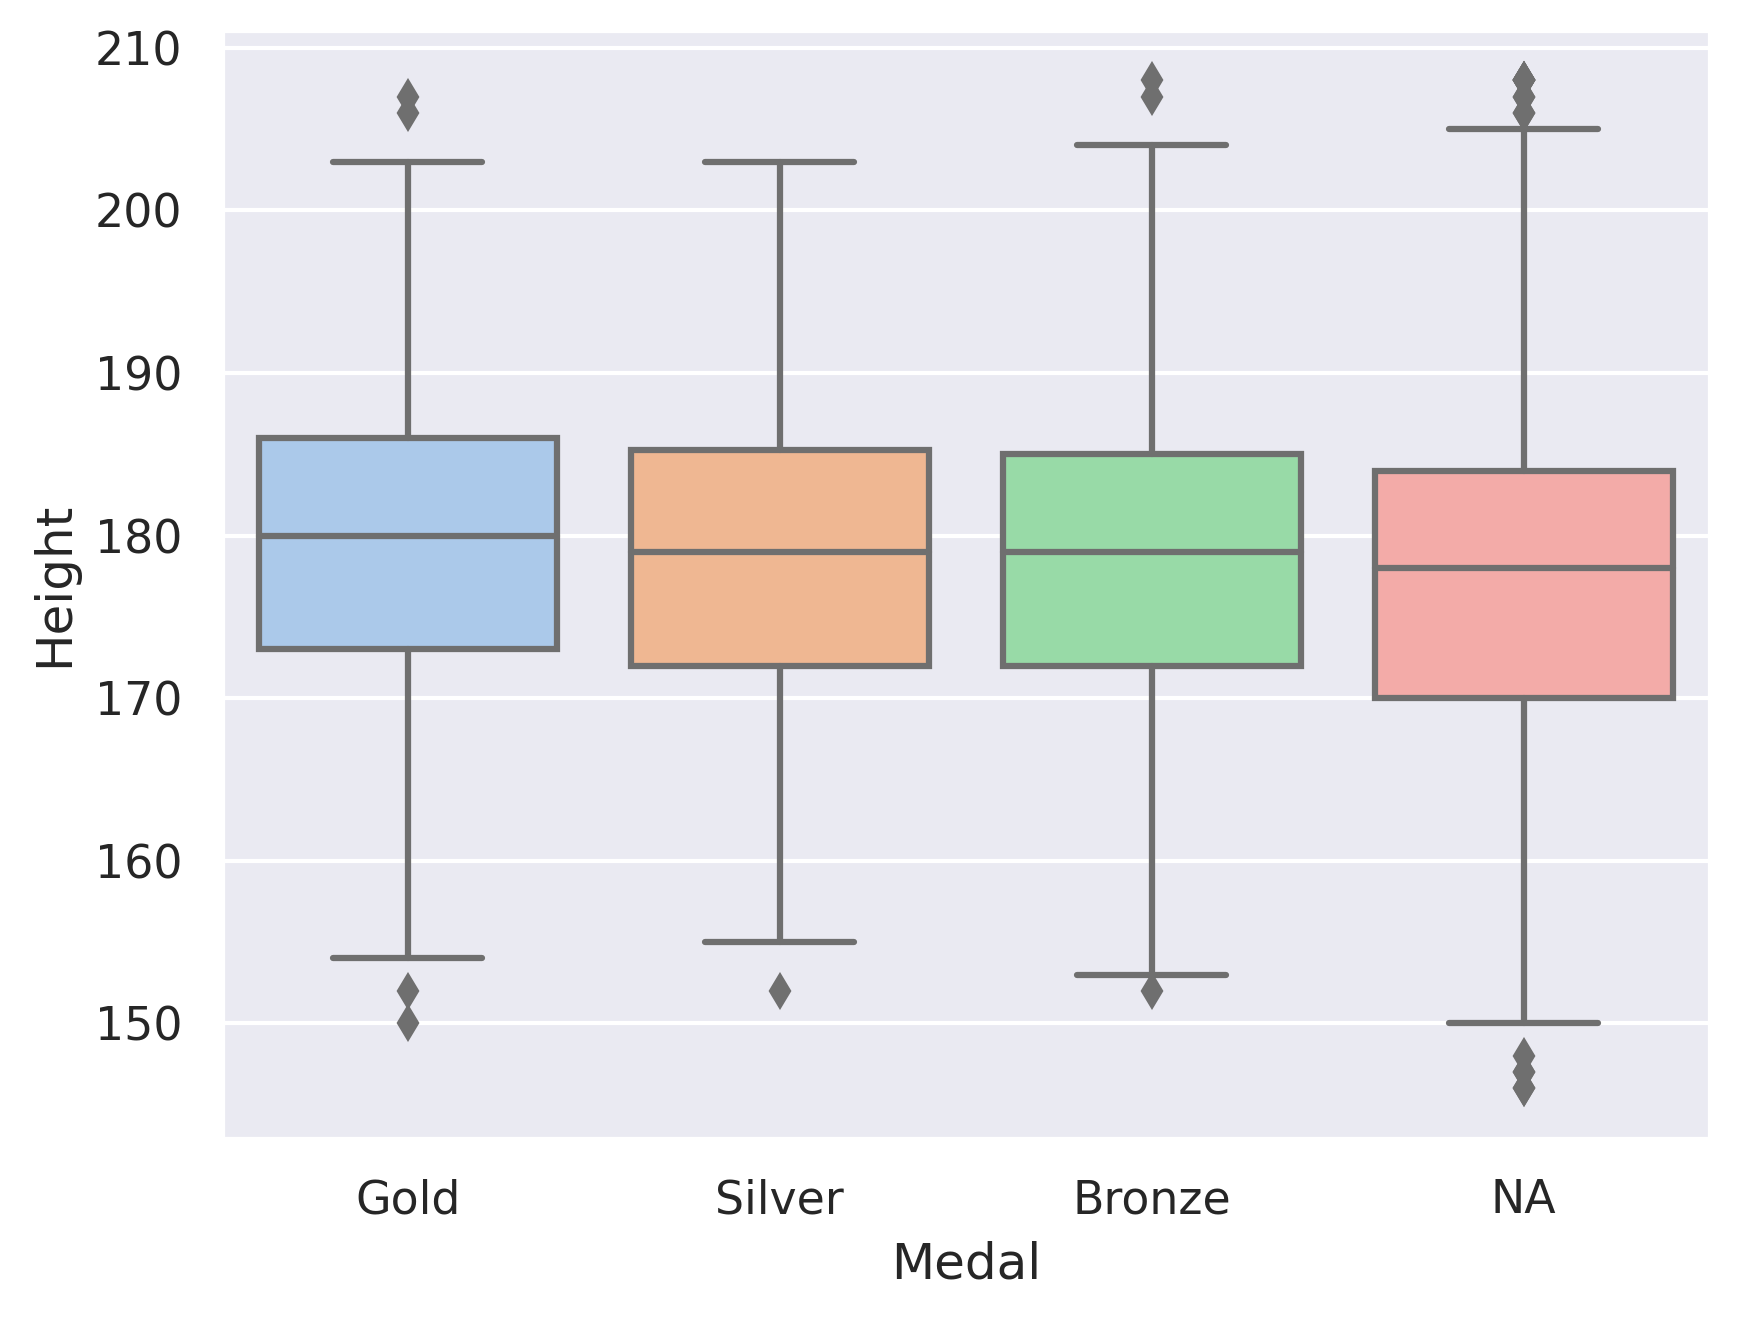

In [0]:
sns.boxplot(data = df, x = 'Medal', y = 'Height', order = ['Gold', 'Silver', 'Bronze', 'NA'], palette = colors)


There is a slight tendency where heavier athletes perform better. Again, this difference is too small, but we should investigate it further.

<AxesSubplot:xlabel='Medal', ylabel='Weight'>

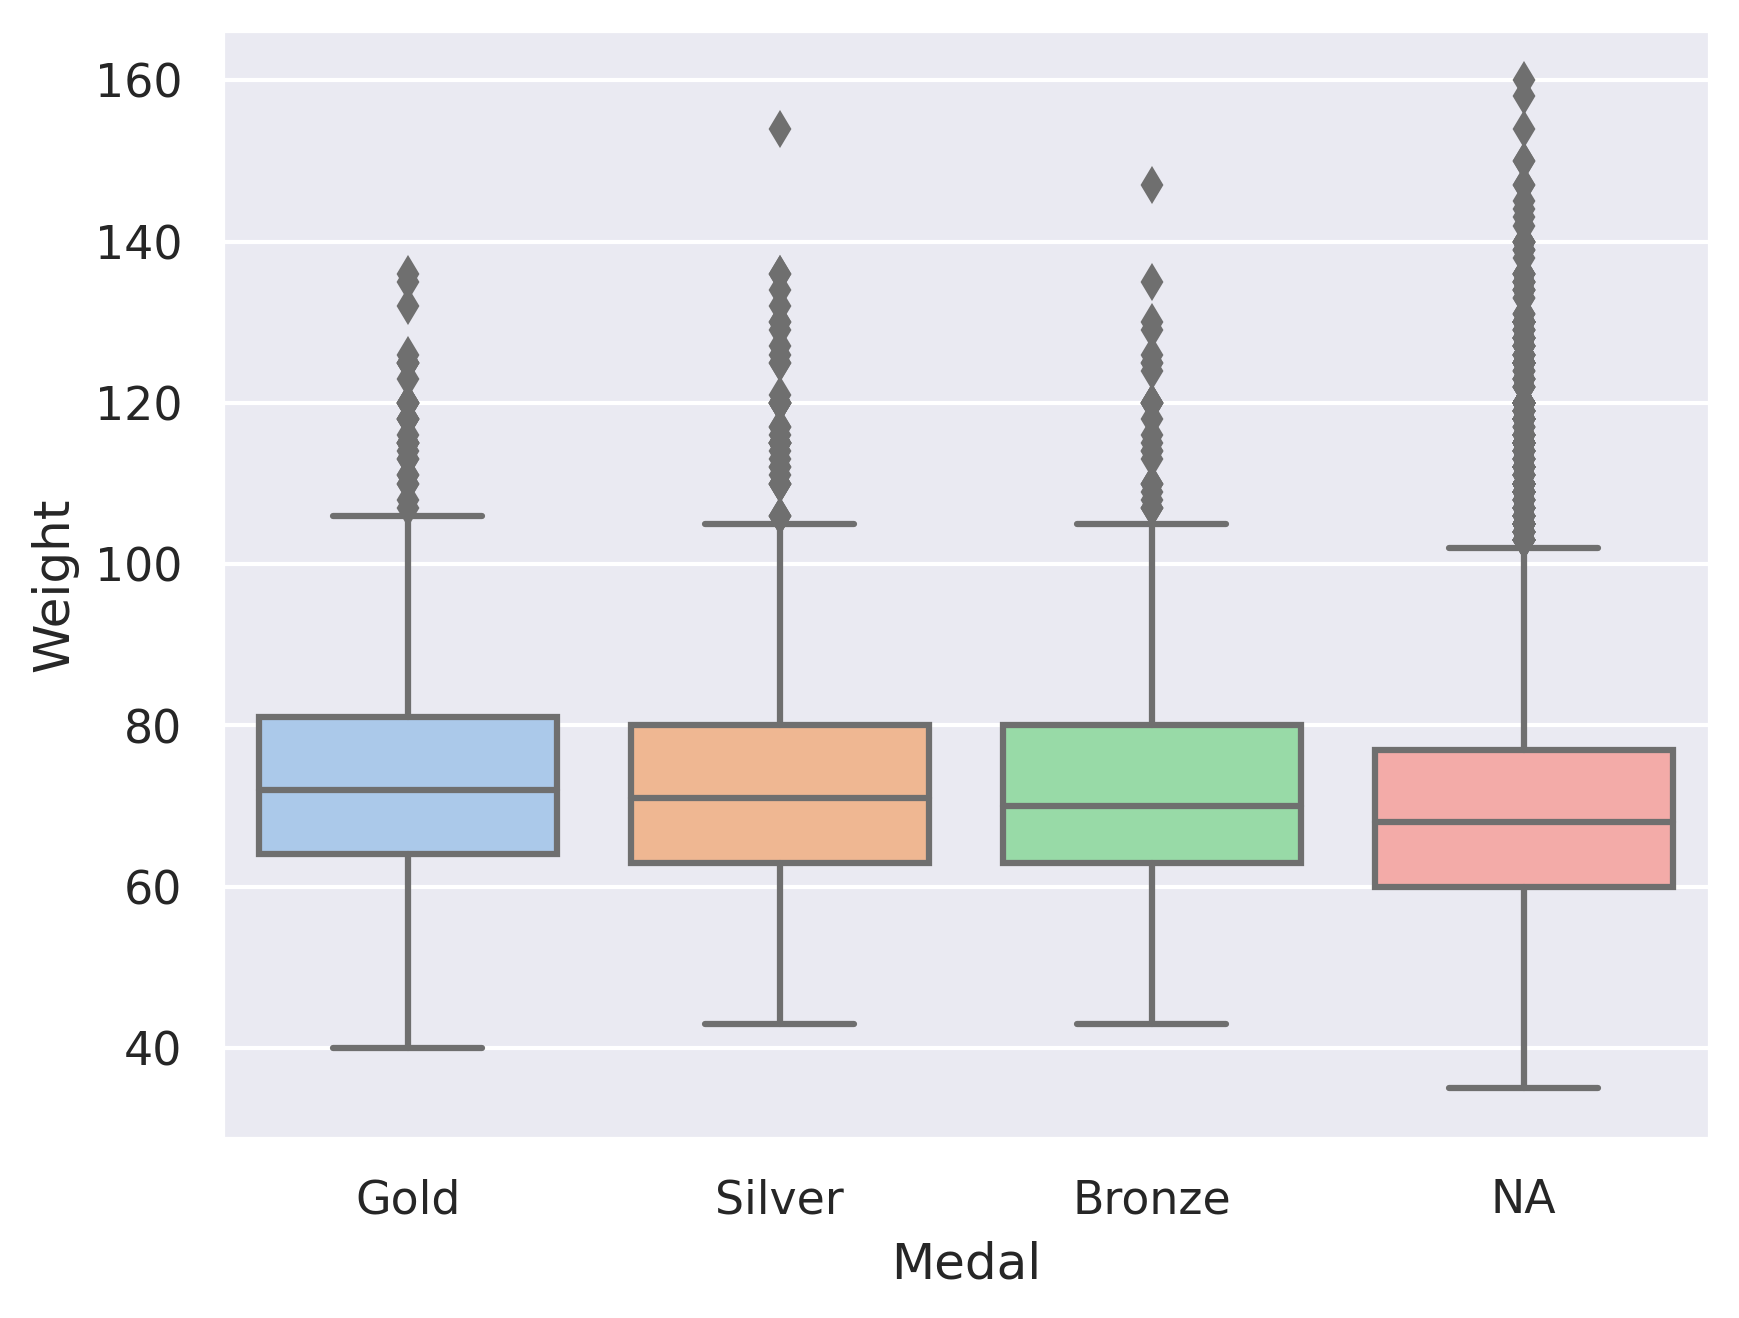

In [0]:
sns.boxplot(data = df, x = 'Medal', y = 'Weight', order = ['Gold', 'Silver', 'Bronze', 'NA'], palette = colors)


## Summary

* We can see that the USA athletes have better performance in most sports, but it is the country with most athletes.
* The distributions of age, weight, and weight are not normal, and have some outliers.
* There seems to be a correlation among this variables and the performance of the athletes, but we still need to do more exhaustive analysis.